<a href="https://colab.research.google.com/github/jaipalb2803/wine_classification/blob/main/wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Using this dataset do wine classification with Analysis and visualization Implement whole Project by cell by cell

Here is all the data you need:
"wine_classify_dataset.csv"

## Data loading

### Subtask:
Load the wine classification dataset into a Pandas DataFrame.


**Reasoning**:
Load the wine classification dataset into a Pandas DataFrame and display the first 5 rows.



In [1]:
import pandas as pd

df = pd.read_csv('wine_classify_dataset.csv')
display(df.head())

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0  
3      9.8      6.0  
4      9.4      5.0

## Data exploration

### Subtask:
Explore the dataset to understand its structure and characteristics.


**Reasoning**:
Explore the dataset by checking its shape, data types, descriptive statistics, missing values, and target variable distribution.



In [2]:
# Shape of the data
print("Shape of the data:", df.shape)

# Data types
print("\nData types:\n", df.dtypes)

# Descriptive statistics
print("\nDescriptive statistics:\n", df.describe())

# Missing values
print("\nMissing values:\n", df.isnull().sum())

# Target variable distribution
print("\nTarget variable distribution:\n", df['quality'].value_counts())

Shape of the data: (1599, 12)

Data types:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

Descriptive statistics:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640

## Data visualization

### Subtask:
Visualize the distribution of features and their relationships with the target variable.


**Reasoning**:
Visualize the distribution of features using histograms, grouped by the target variable (wine quality).



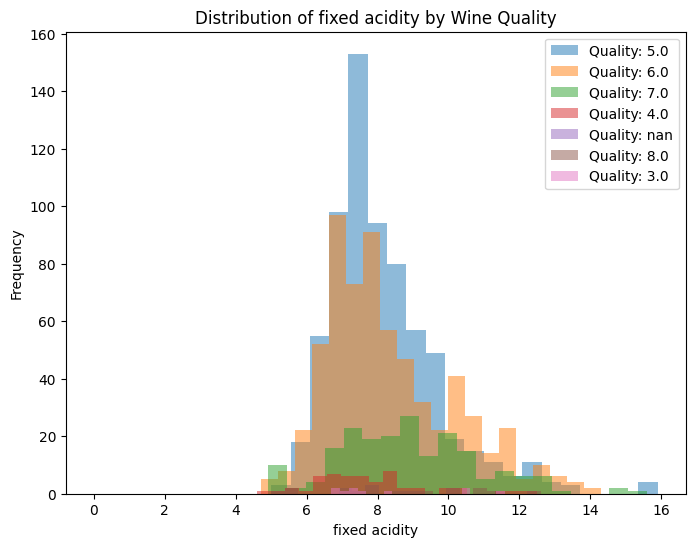

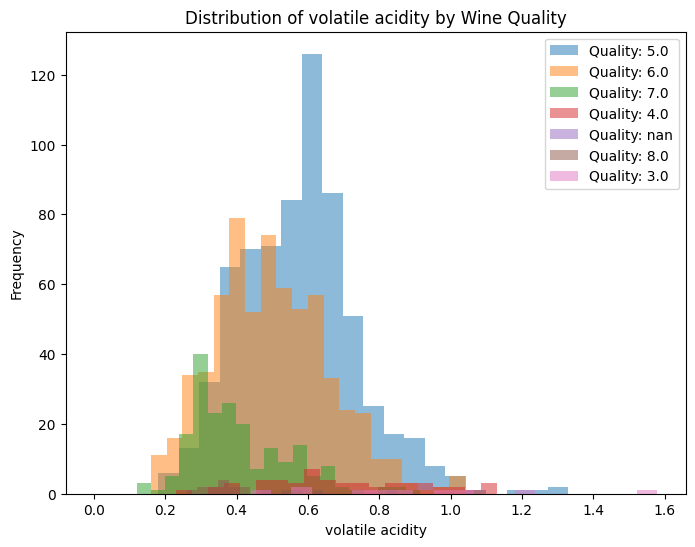

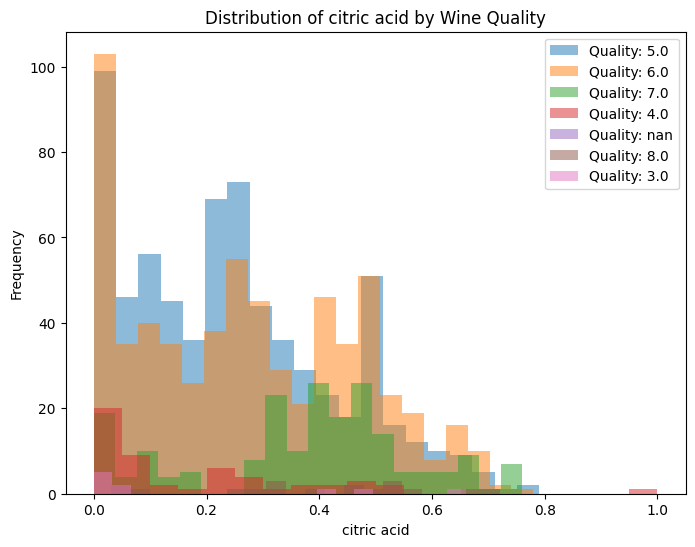

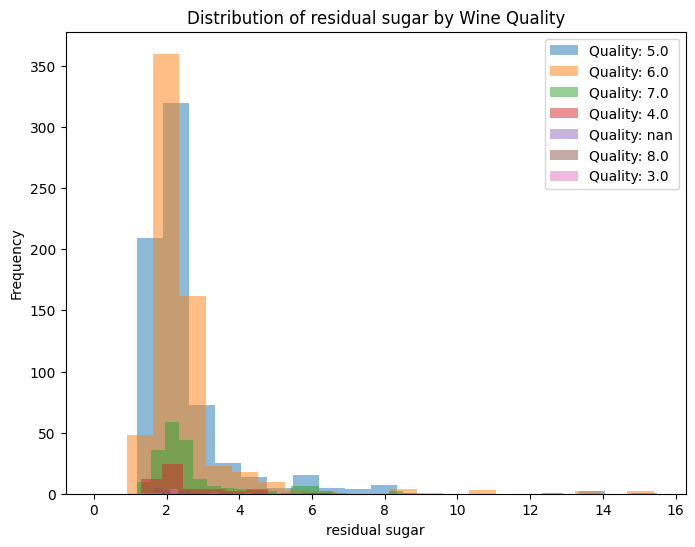

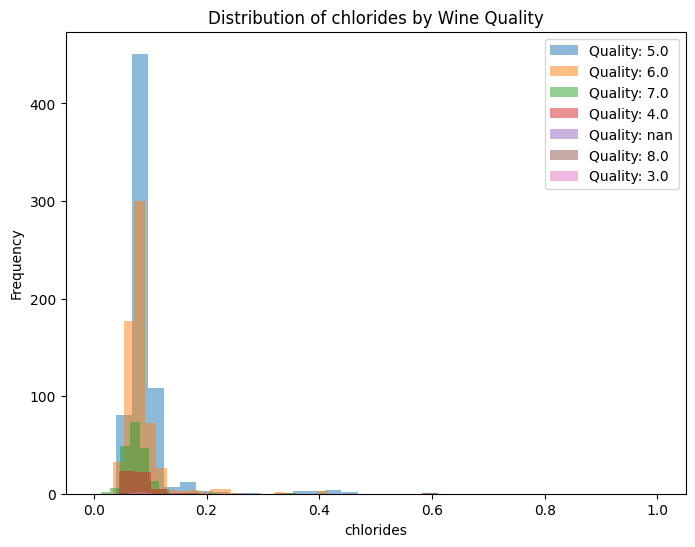

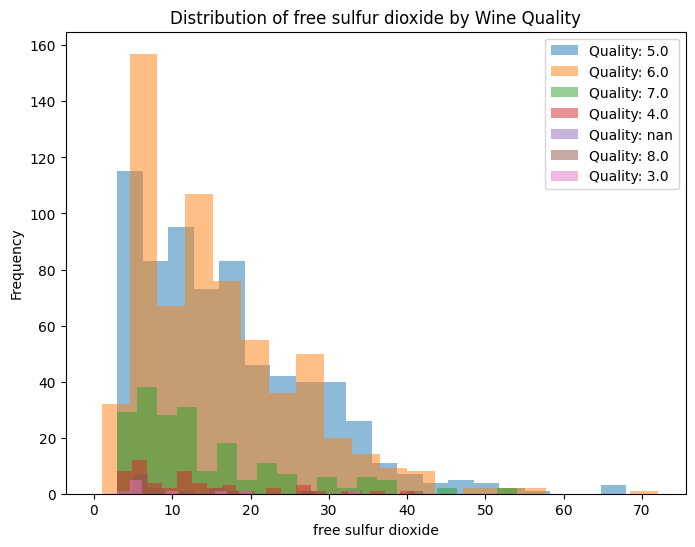

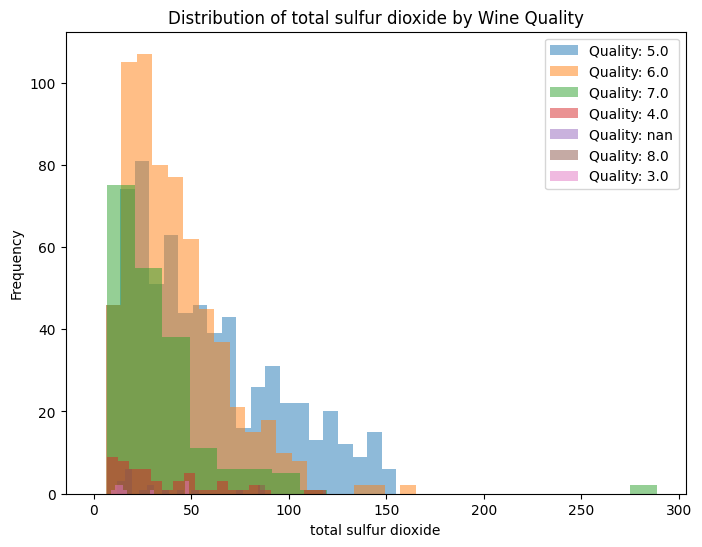

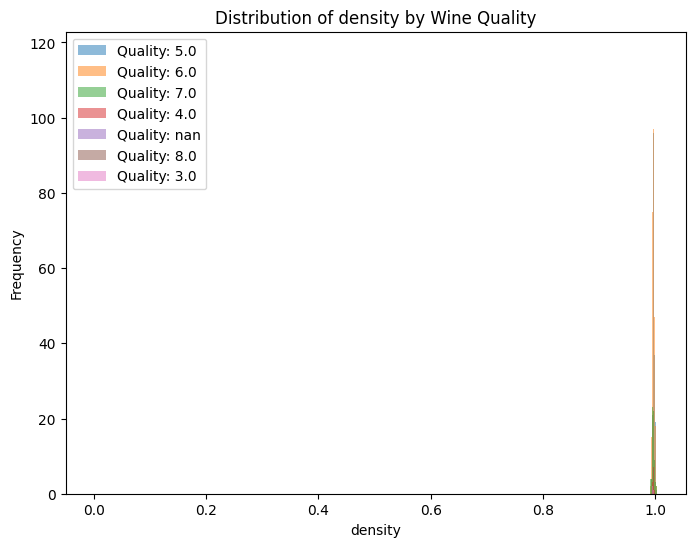

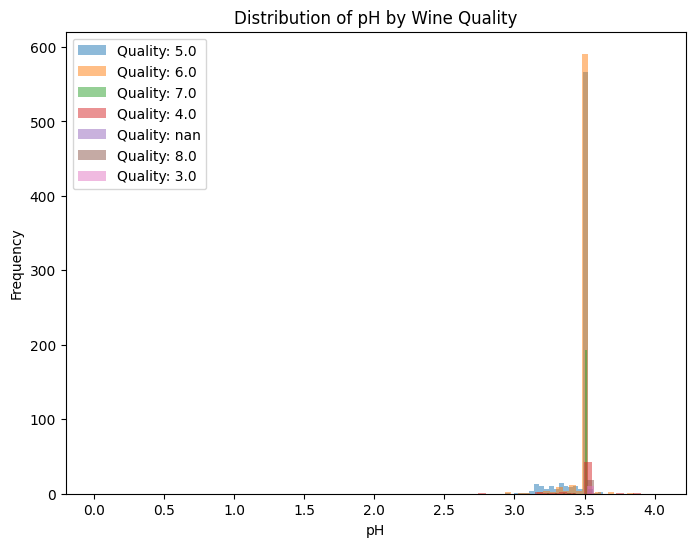

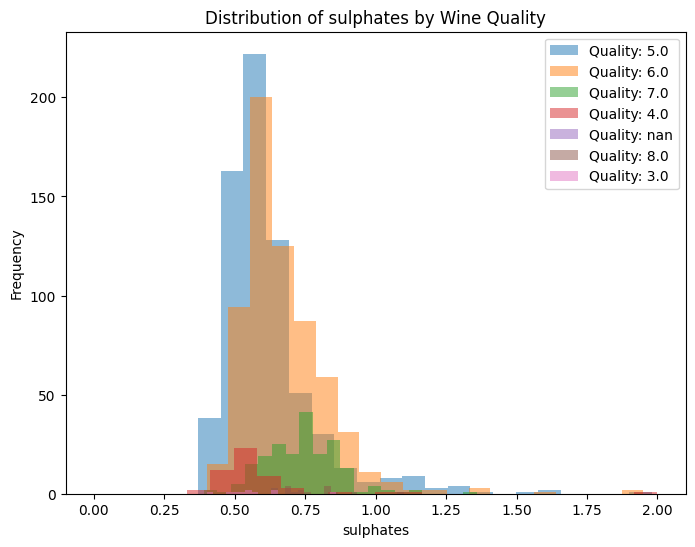

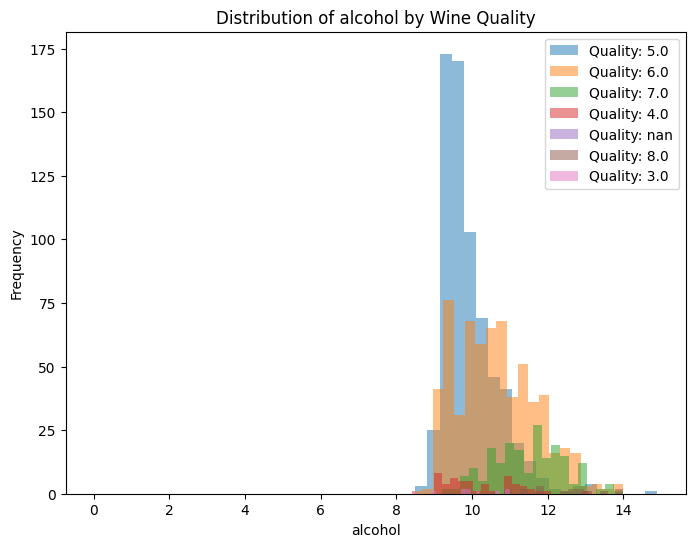

<Figure size 800x600 with 0 Axes>

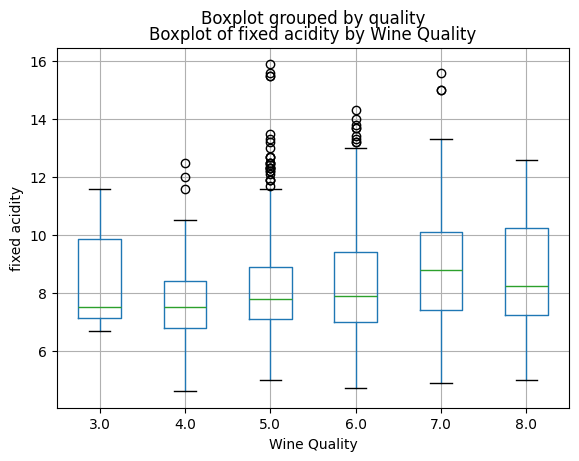

<Figure size 800x600 with 0 Axes>

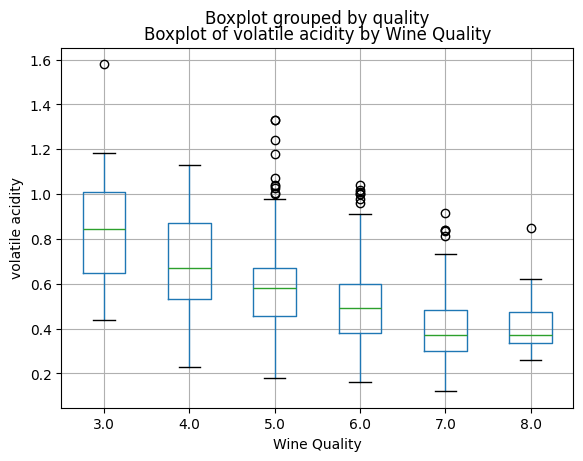

<Figure size 800x600 with 0 Axes>

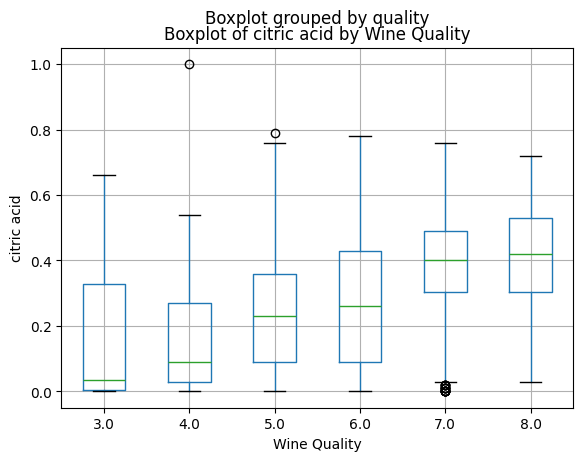

<Figure size 800x600 with 0 Axes>

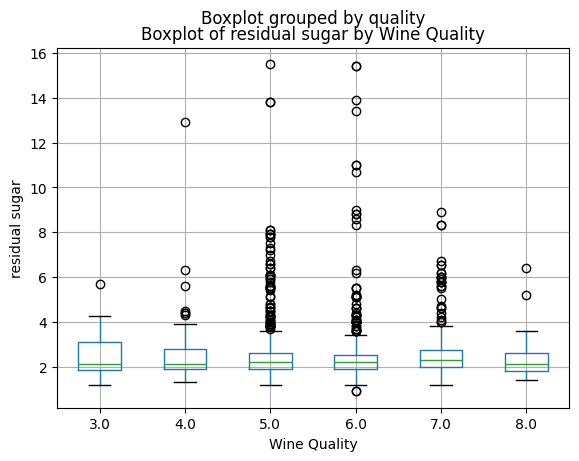

<Figure size 800x600 with 0 Axes>

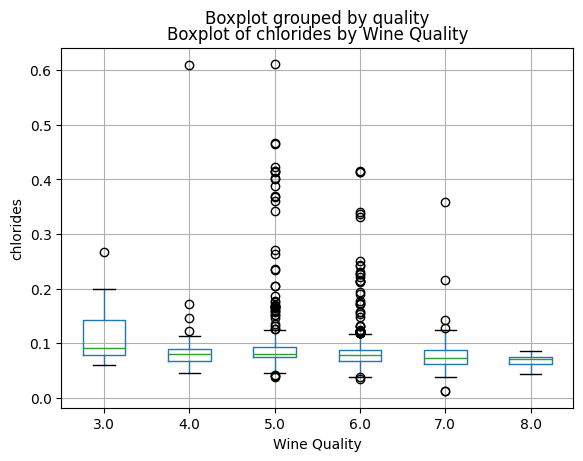

<Figure size 800x600 with 0 Axes>

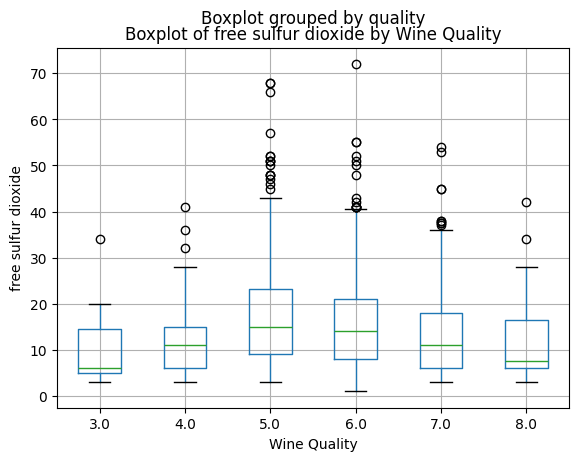

<Figure size 800x600 with 0 Axes>

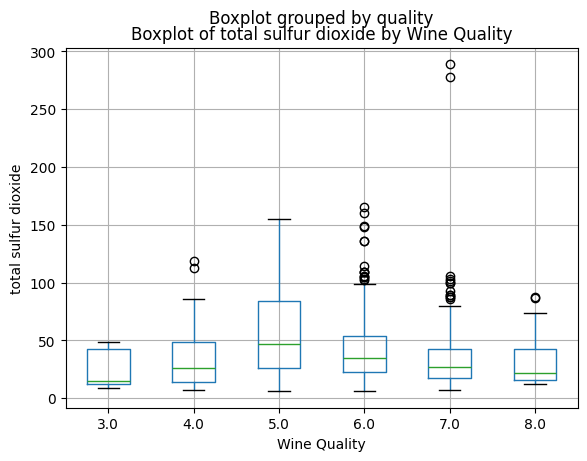

<Figure size 800x600 with 0 Axes>

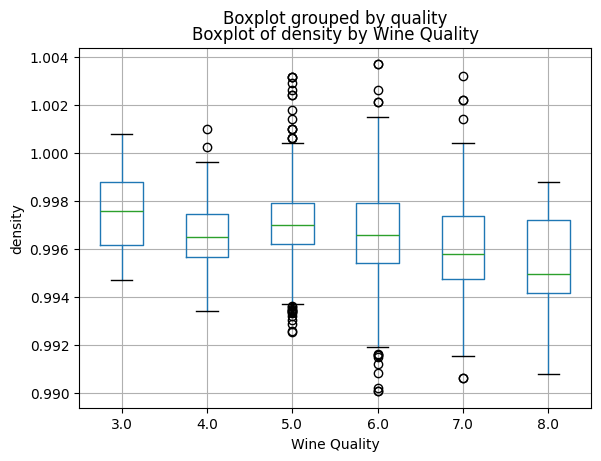

<Figure size 800x600 with 0 Axes>

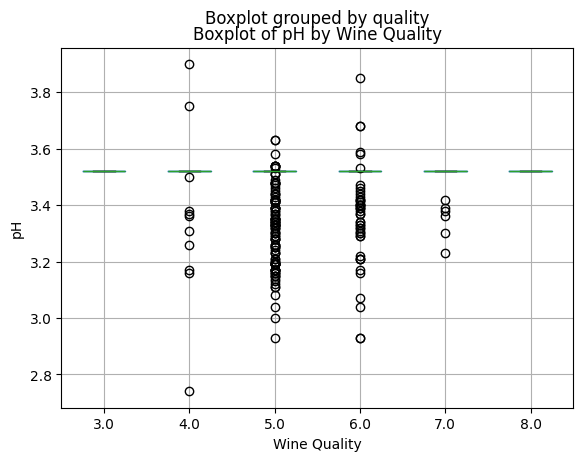

<Figure size 800x600 with 0 Axes>

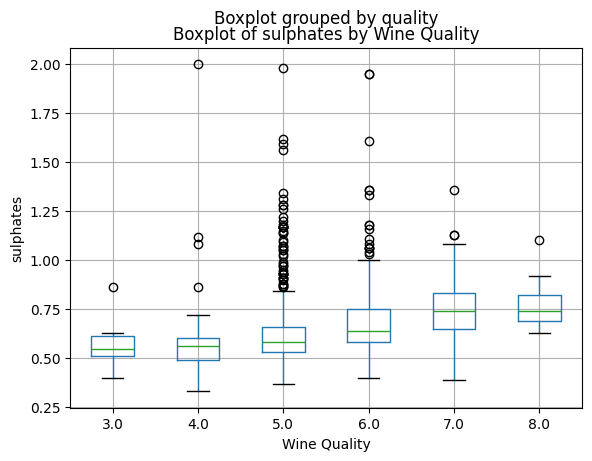

<Figure size 800x600 with 0 Axes>

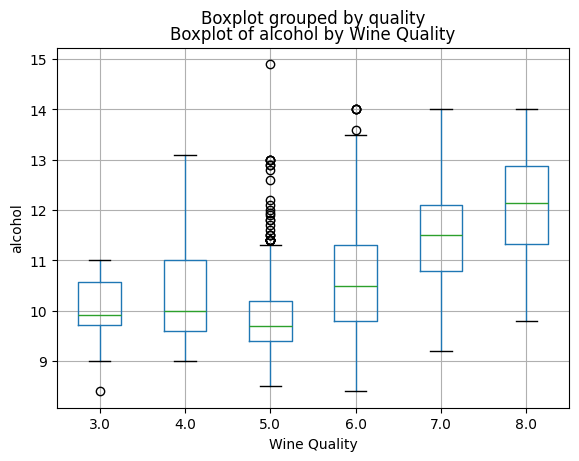

In [3]:
import matplotlib.pyplot as plt

# Create histograms for each numerical feature
for column in df.columns[:-1]:  # Exclude the 'quality' column
    plt.figure(figsize=(8, 6))
    for quality in df['quality'].unique():
        plt.hist(df[df['quality'] == quality][column], bins=20, alpha=0.5, label=f'Quality: {quality}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column} by Wine Quality')
    plt.legend()
    plt.show()

# Generate box plots for each numerical feature grouped by wine quality
for column in df.columns[:-1]:  # Exclude the 'quality' column
    plt.figure(figsize=(8, 6))
    df.boxplot(column=column, by='quality')
    plt.xlabel('Wine Quality')
    plt.ylabel(column)
    plt.title(f'Boxplot of {column} by Wine Quality')
    plt.show()

**Reasoning**:
Visualize the correlation between features using a heatmap and scatter plots to understand their relationships with the target variable.



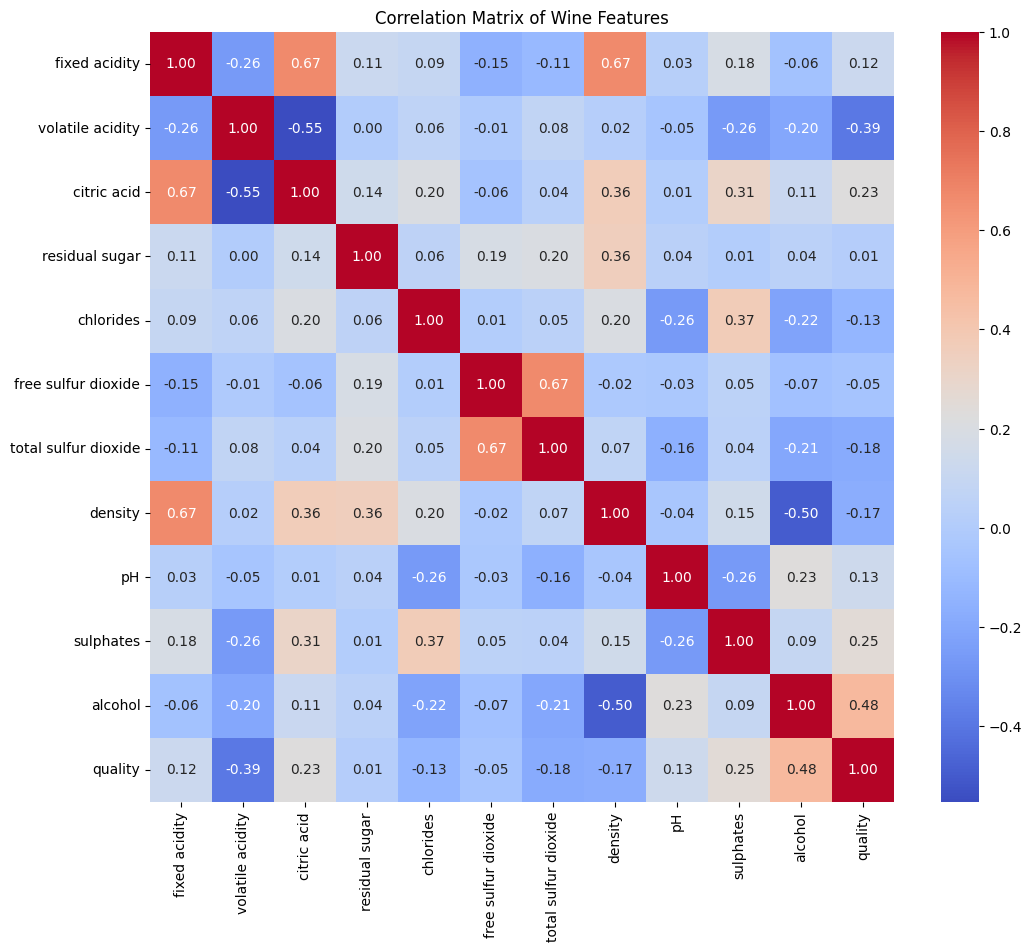

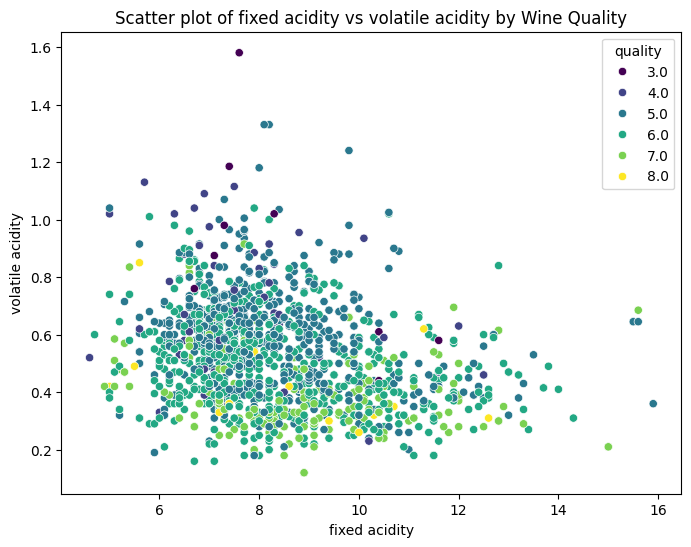

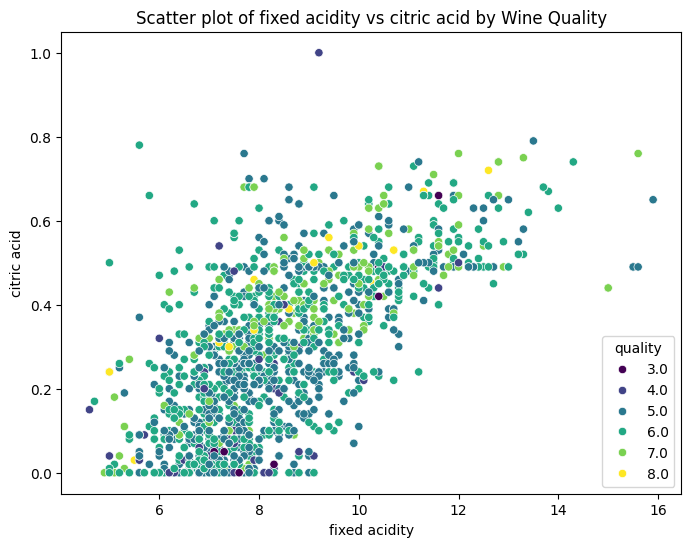

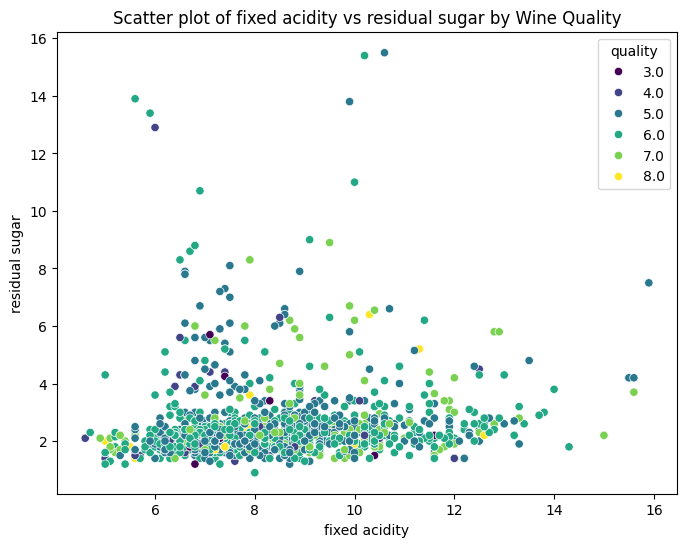

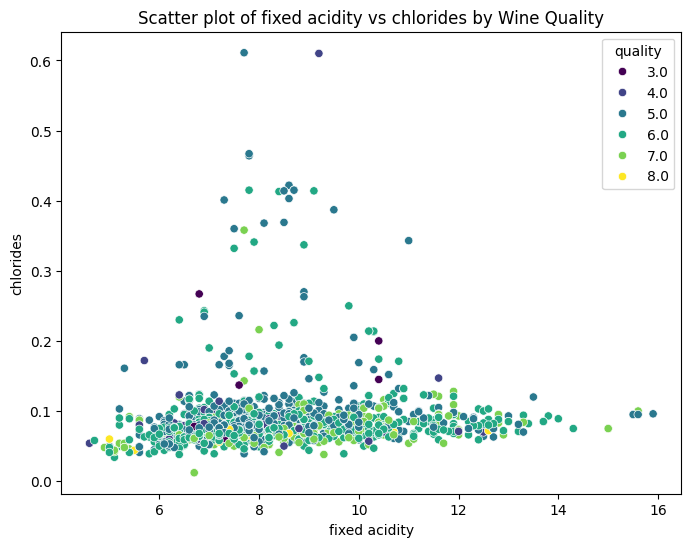

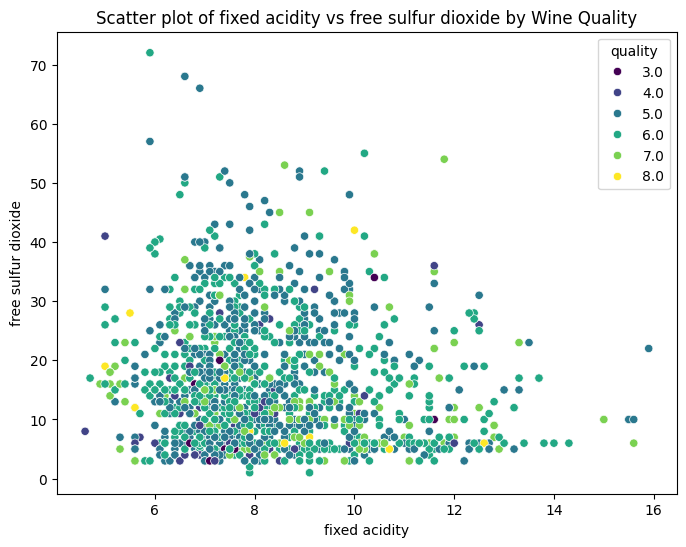

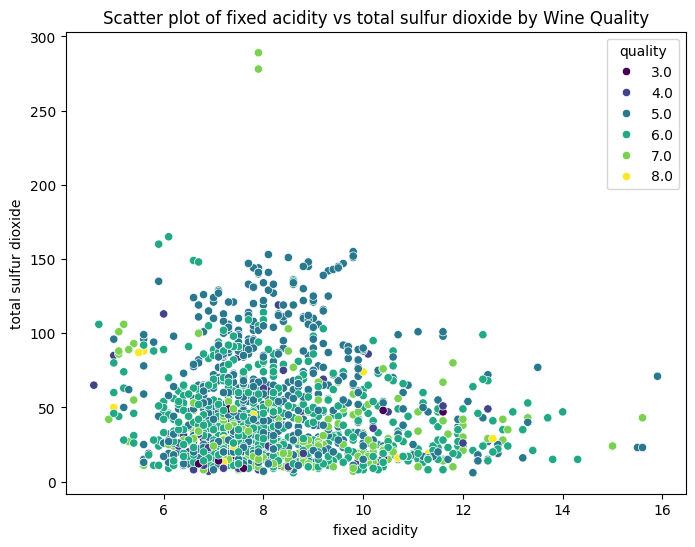

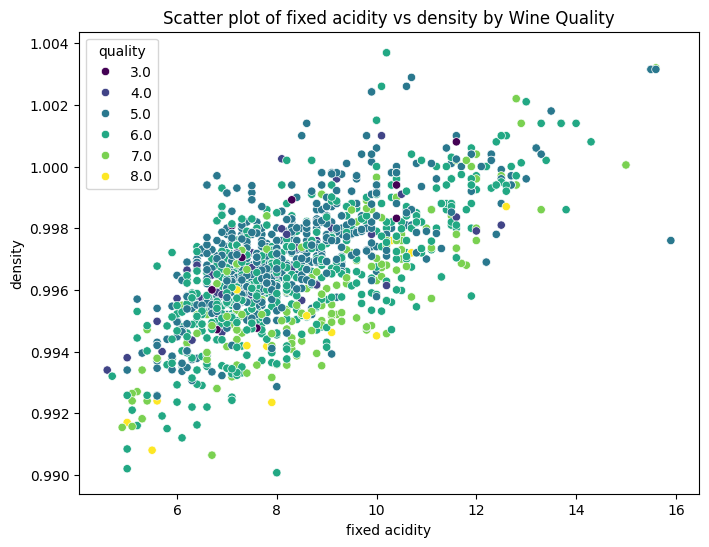

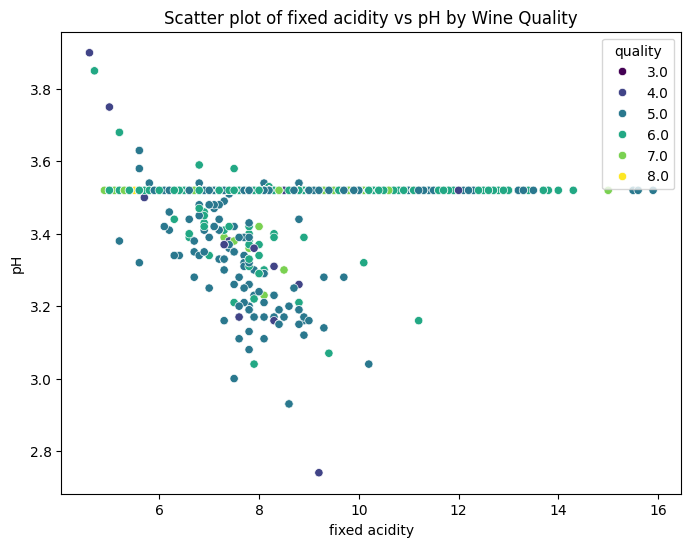

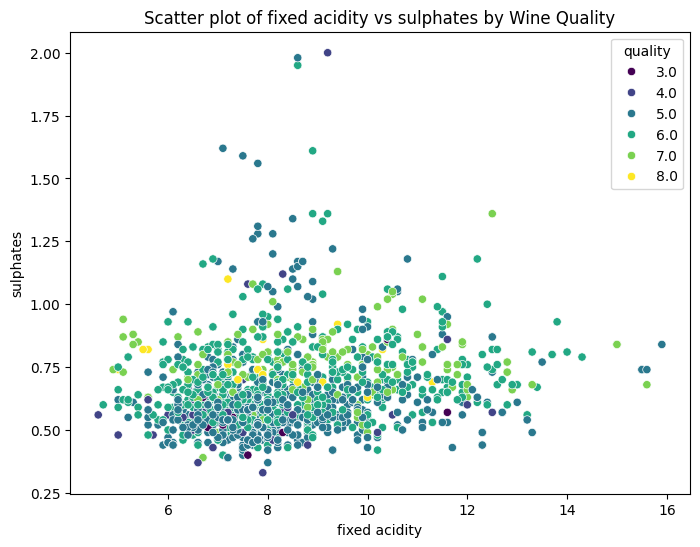

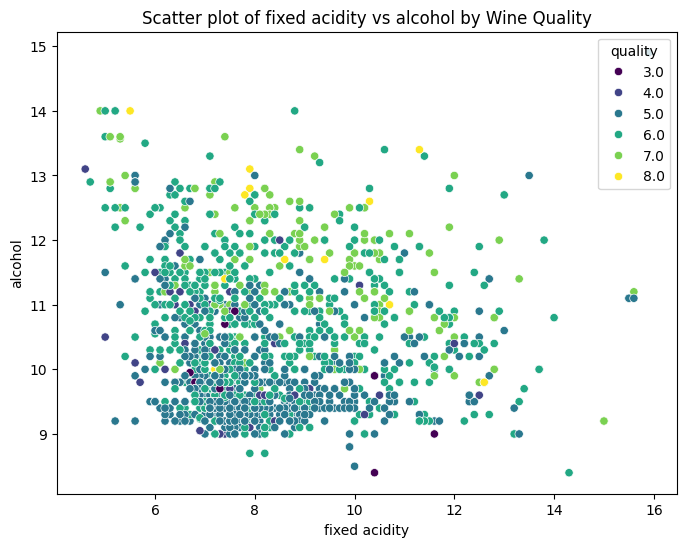

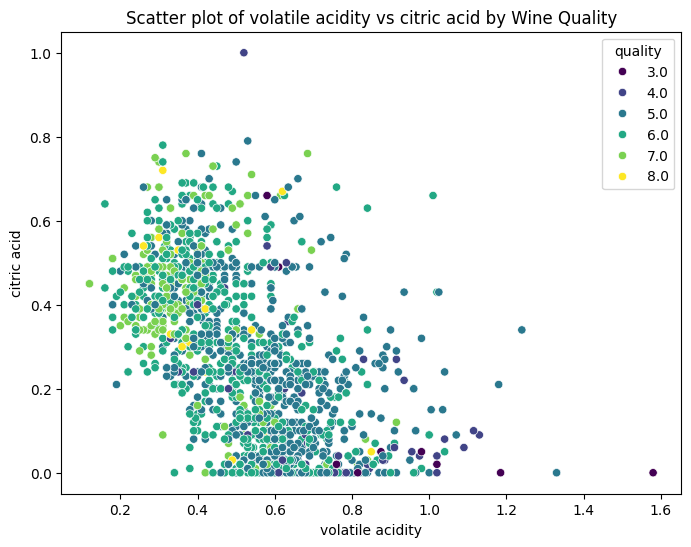

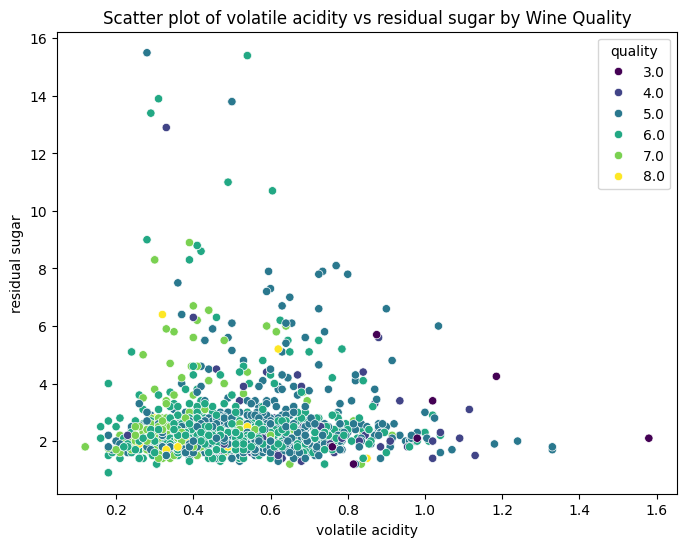

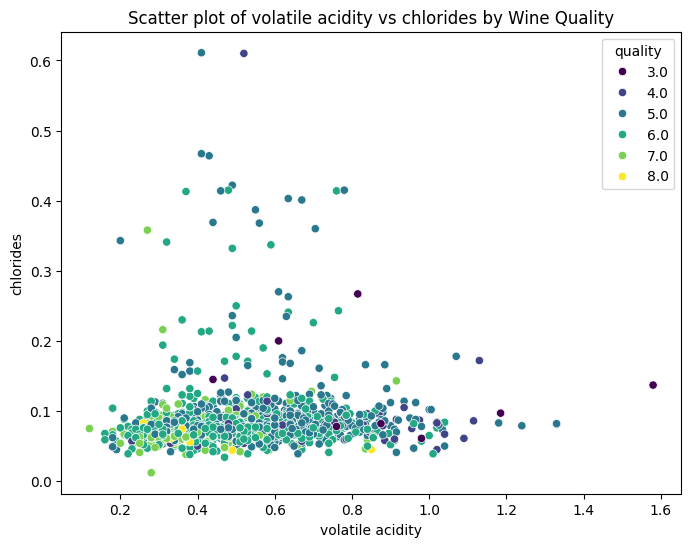

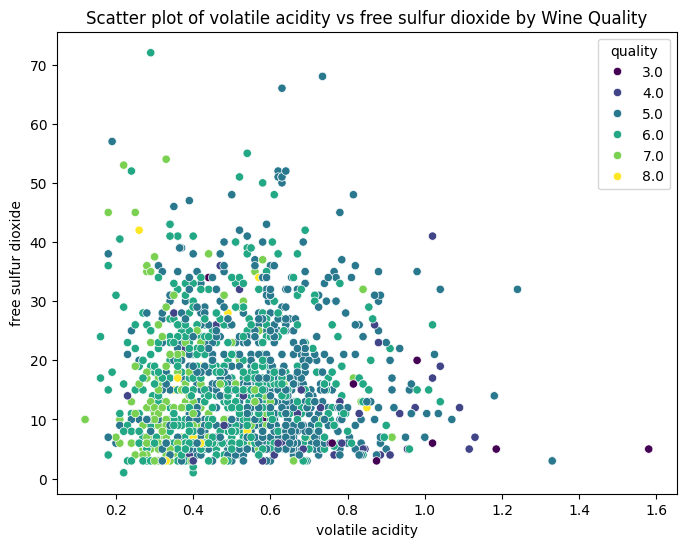

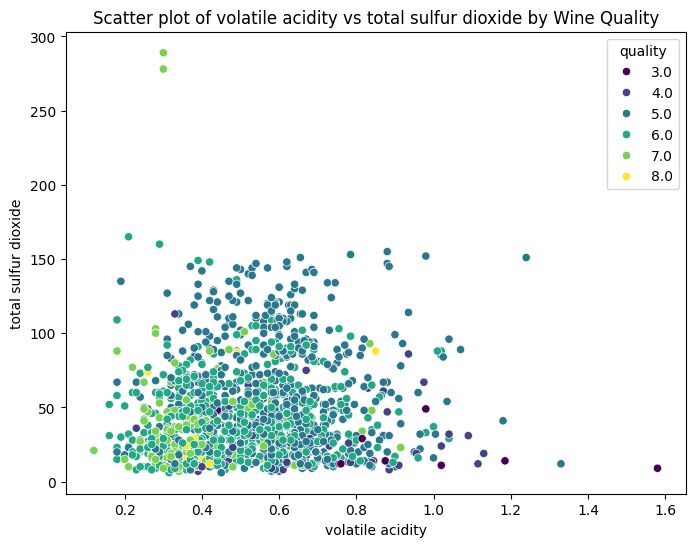

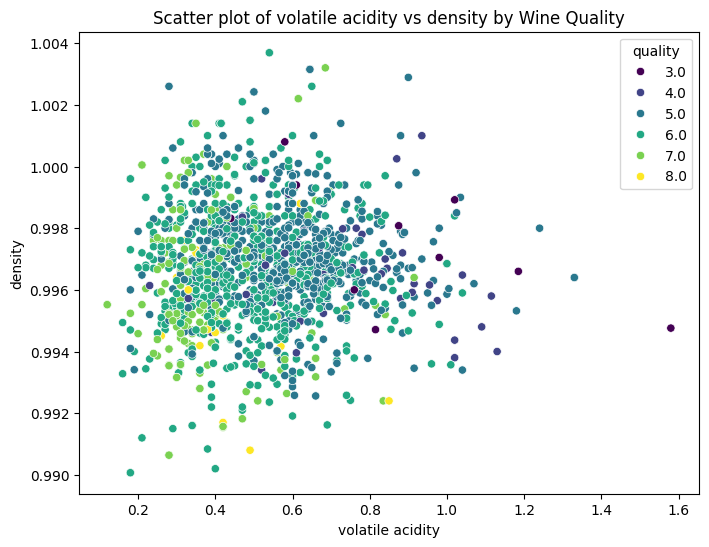

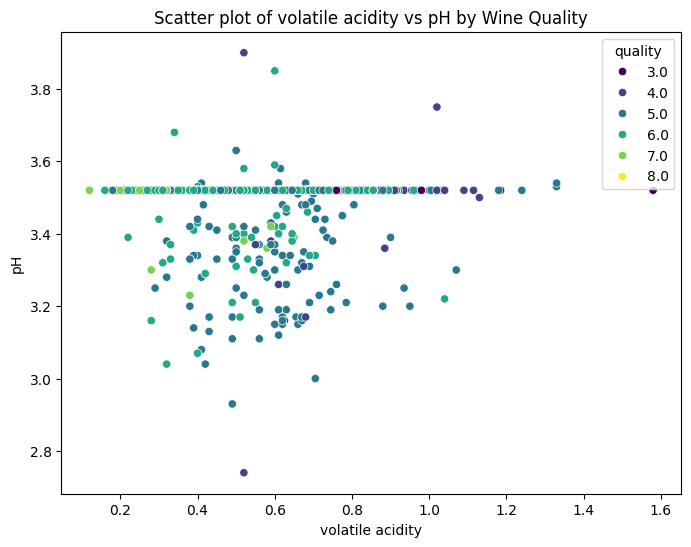

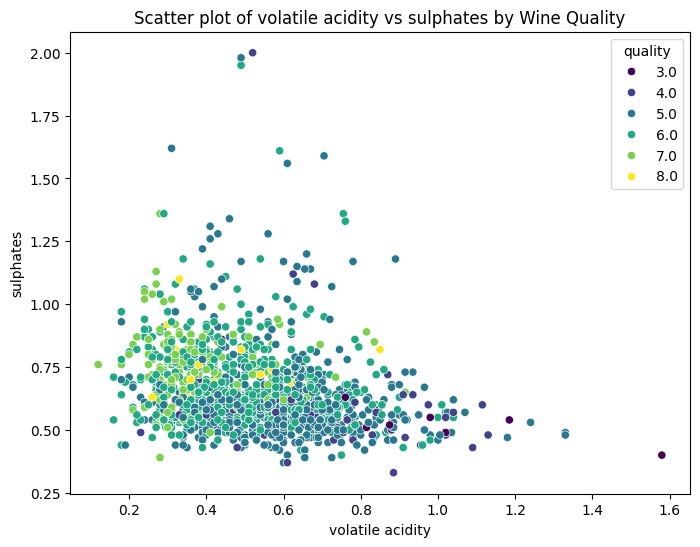

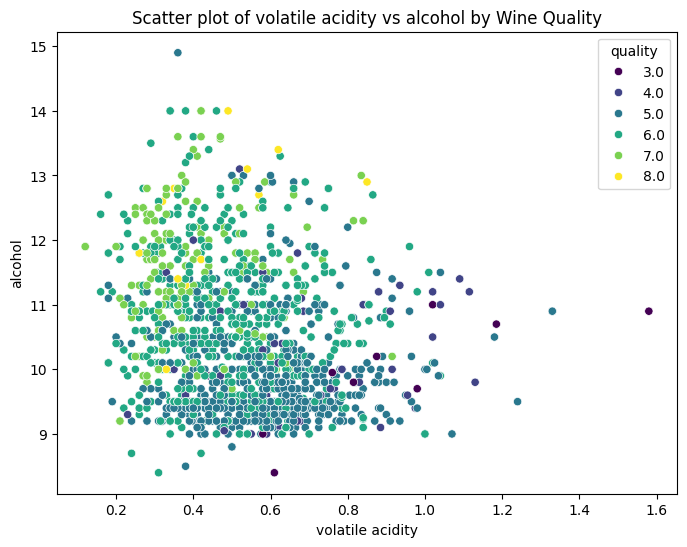

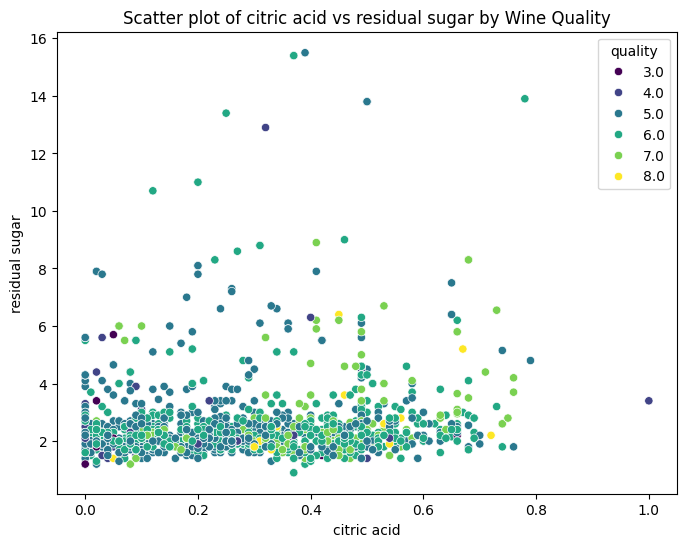

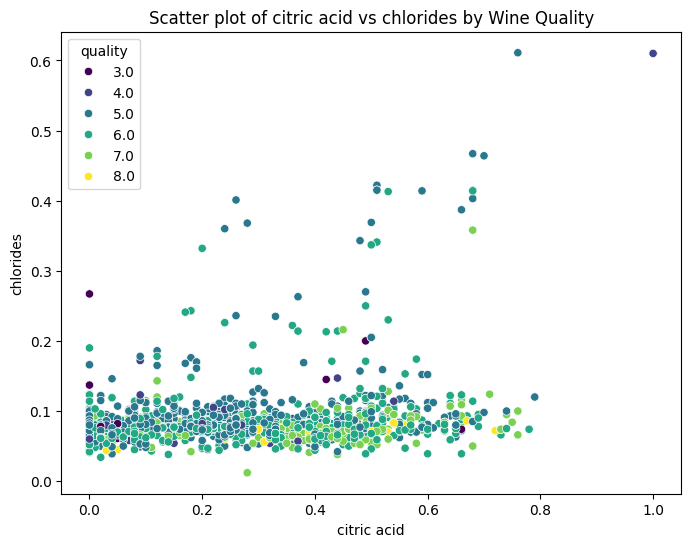

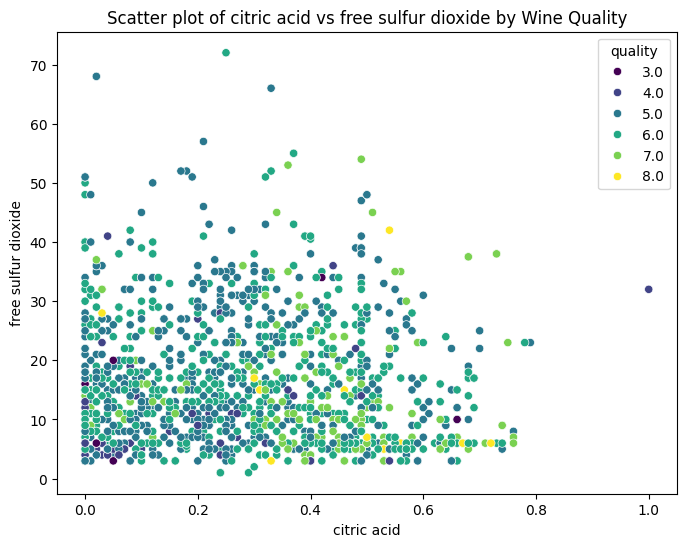

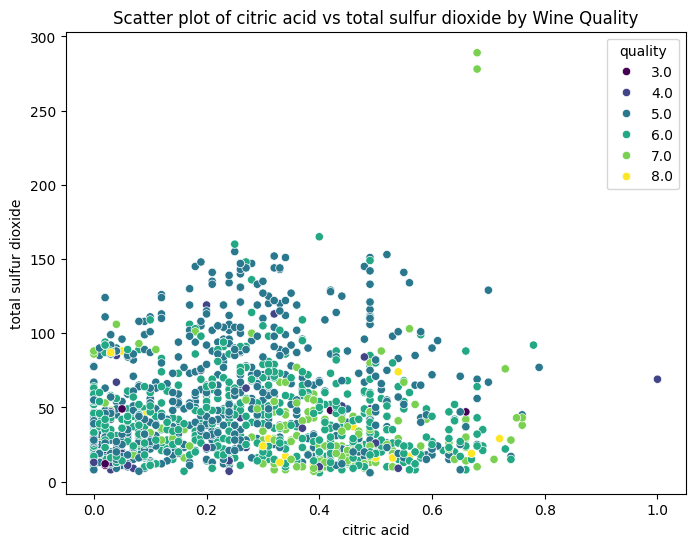

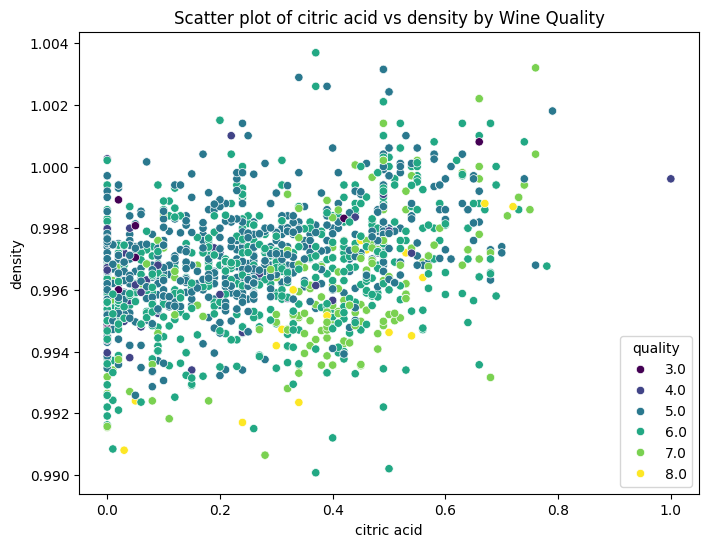

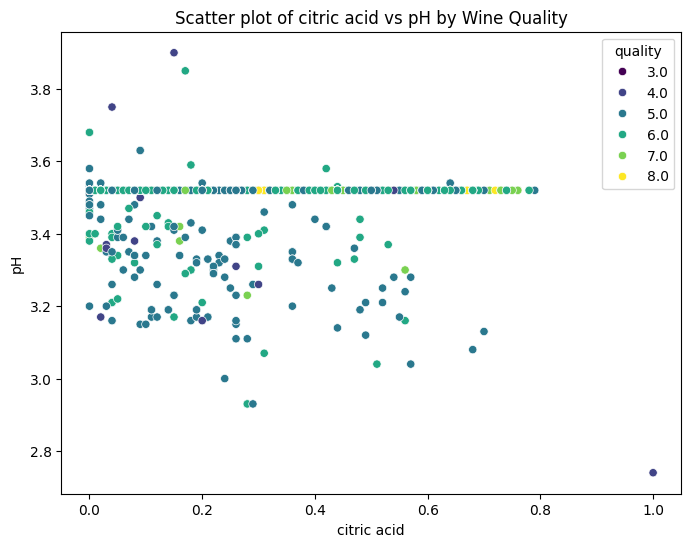

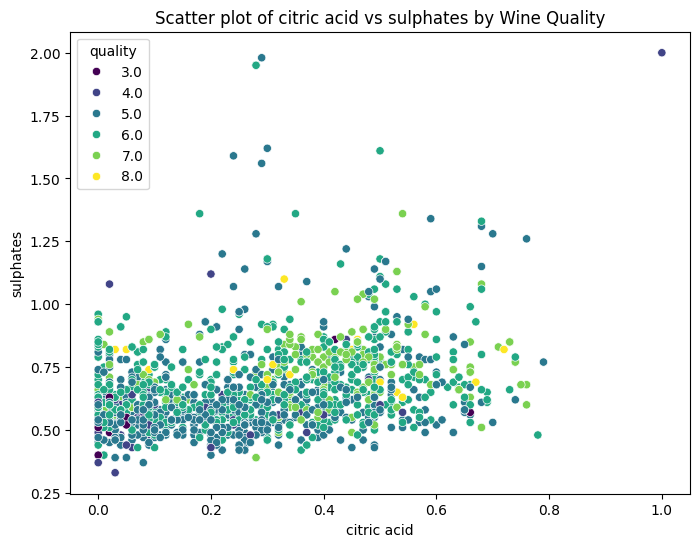

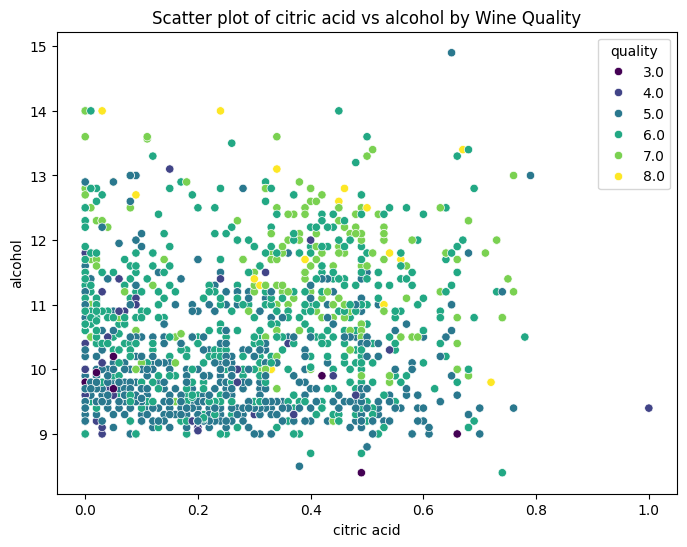

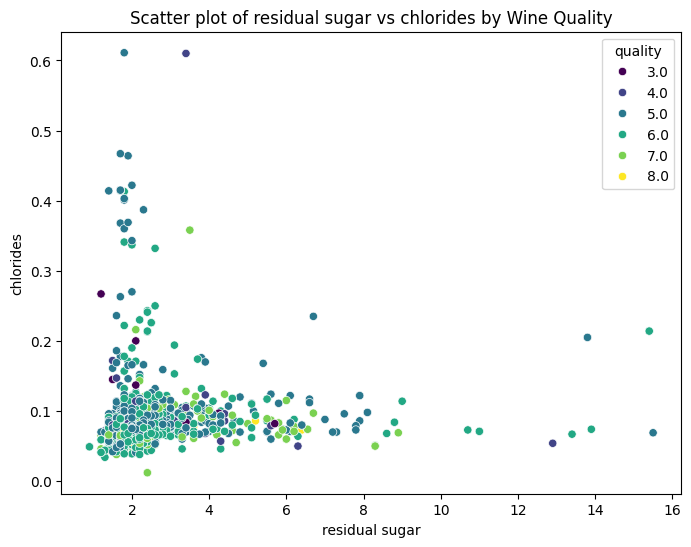

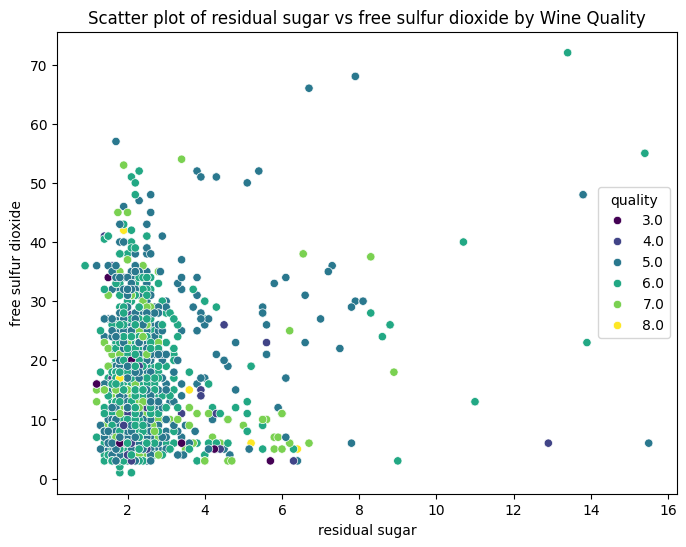

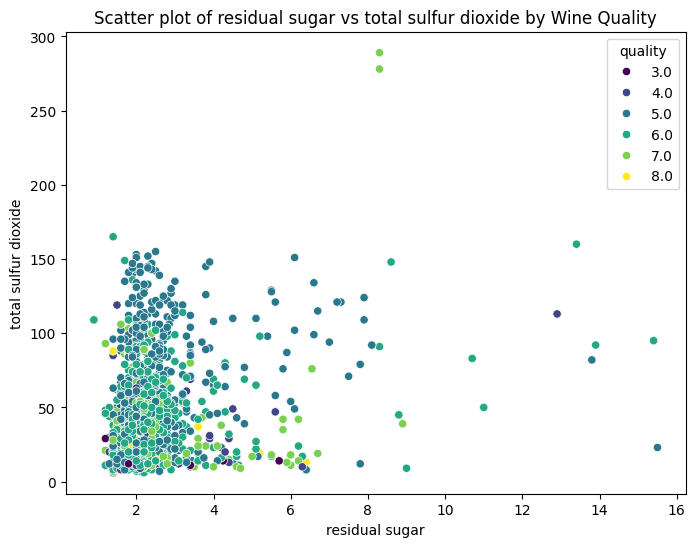

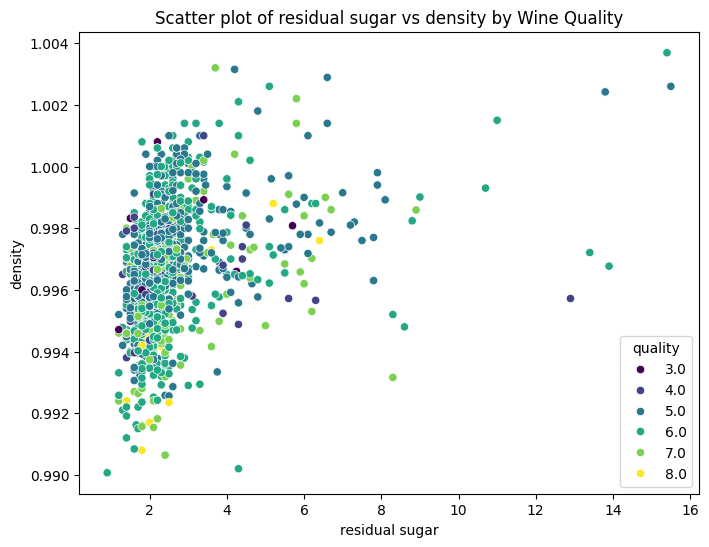

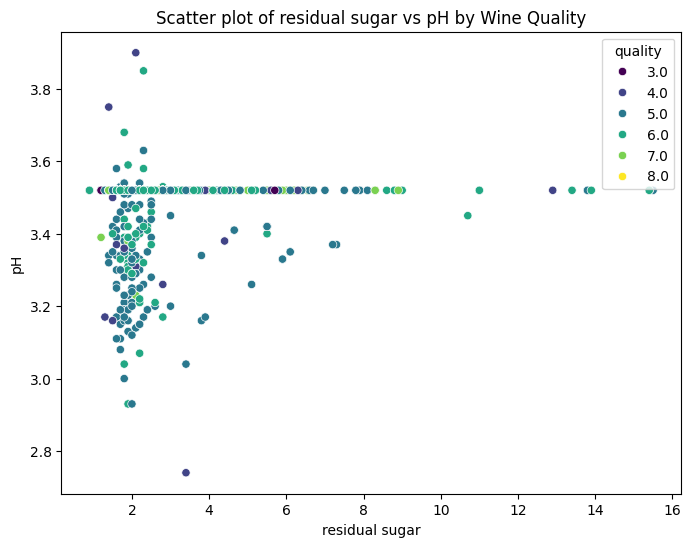

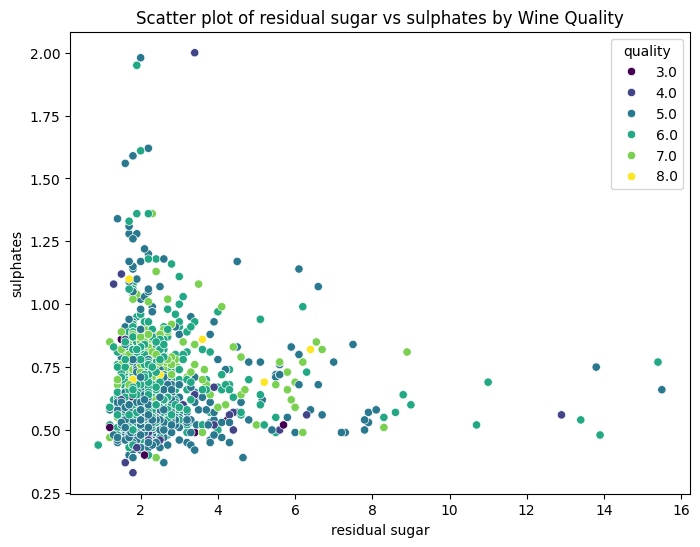

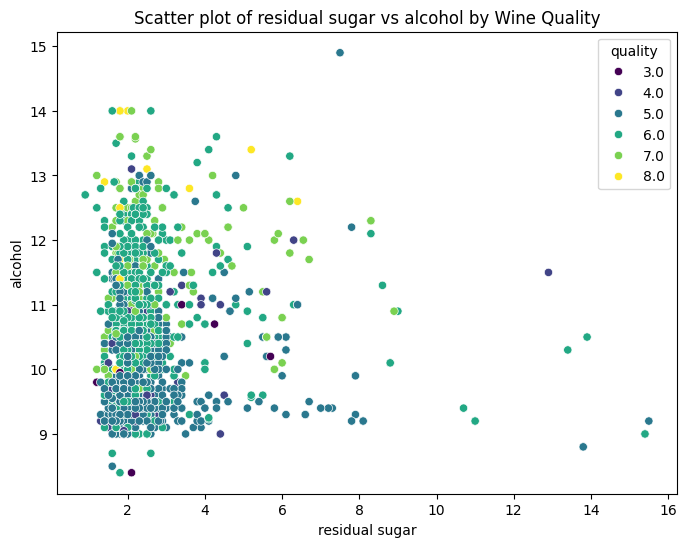

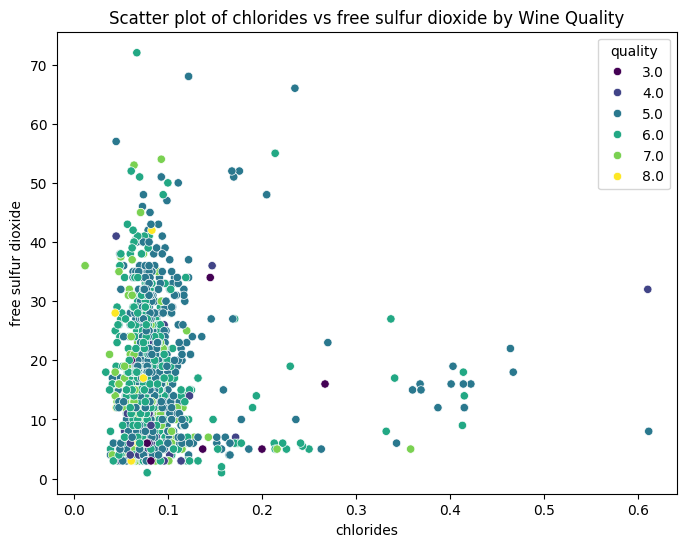

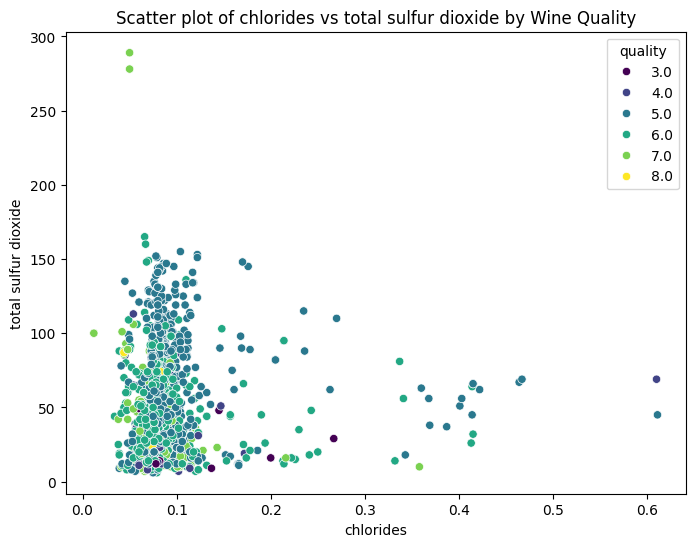

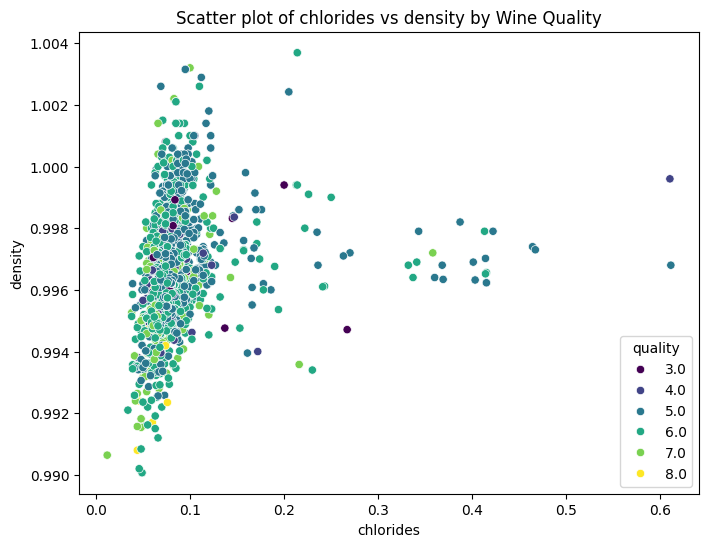

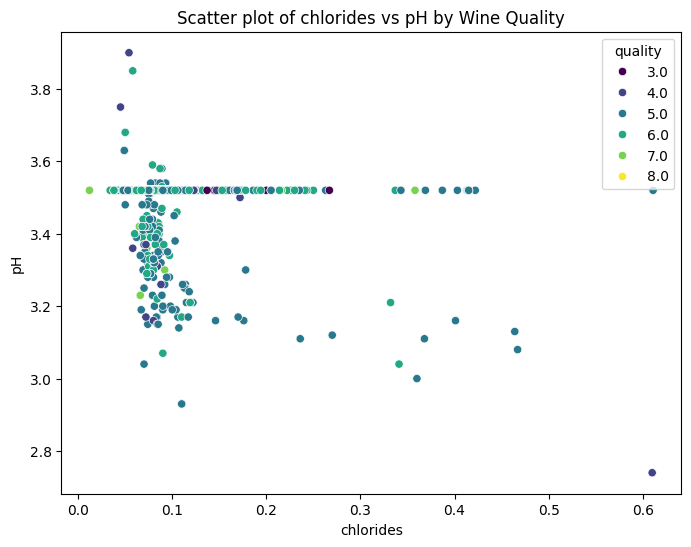

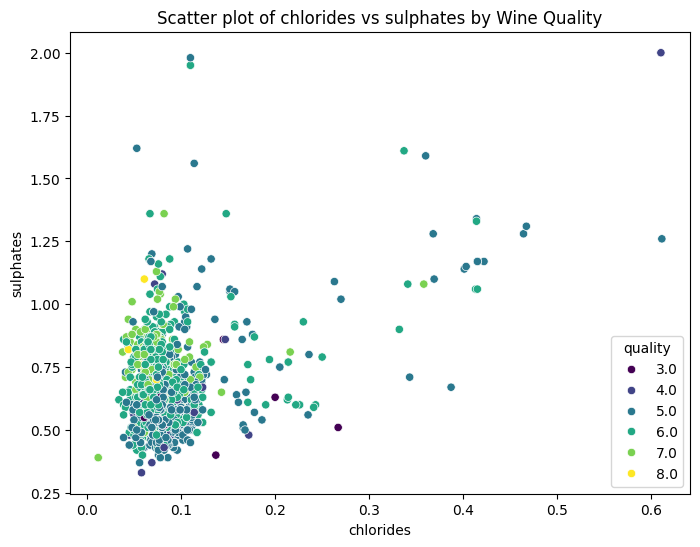

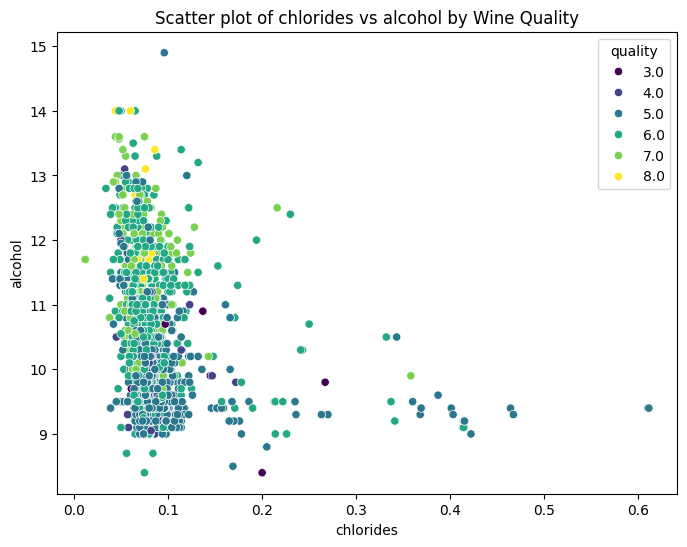

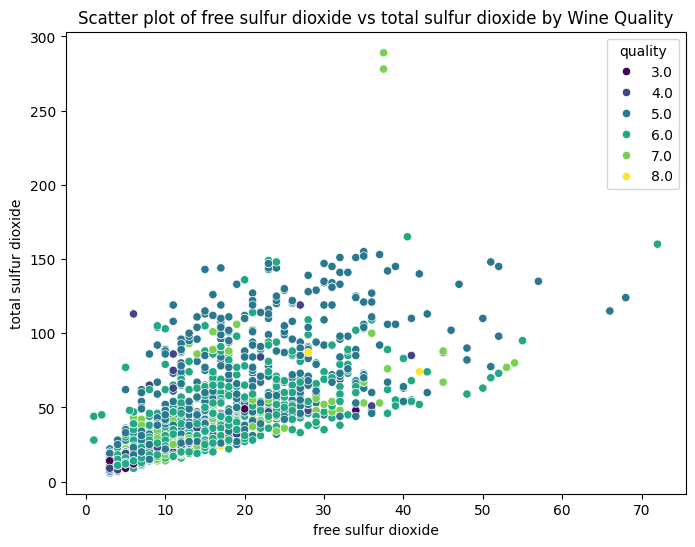

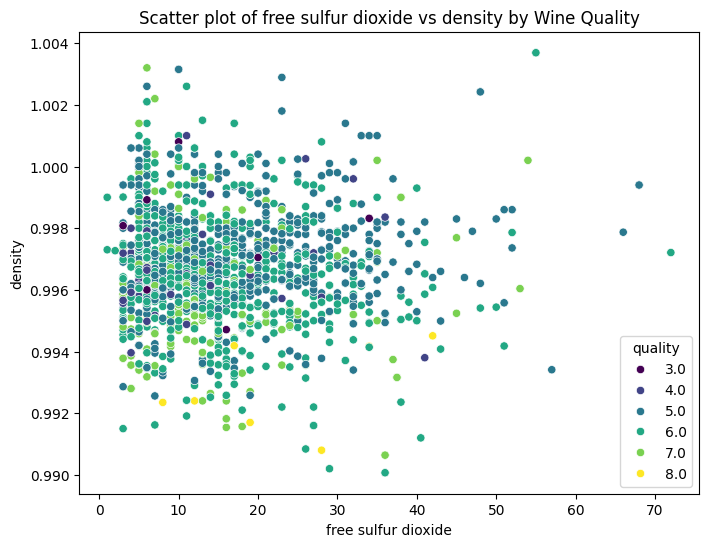

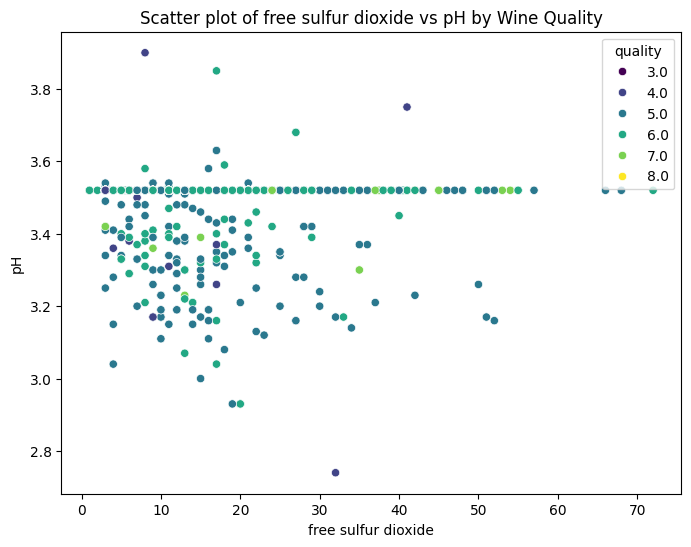

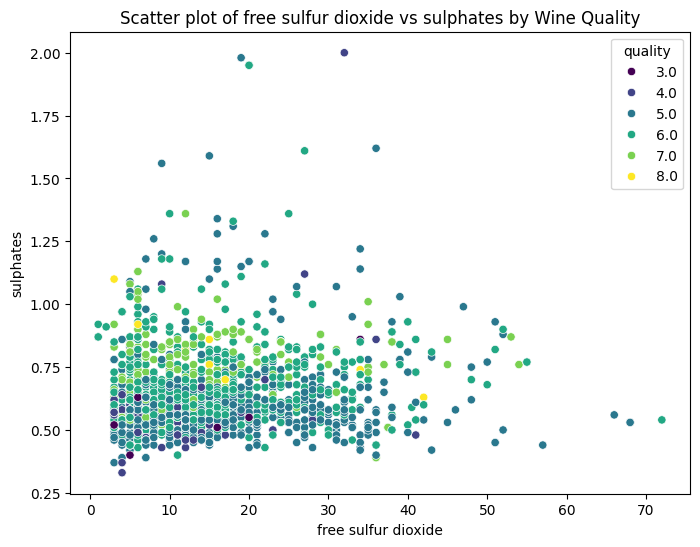

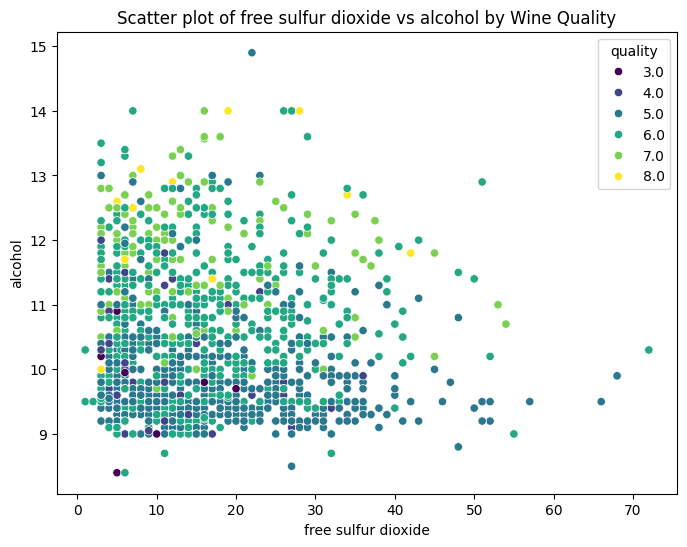

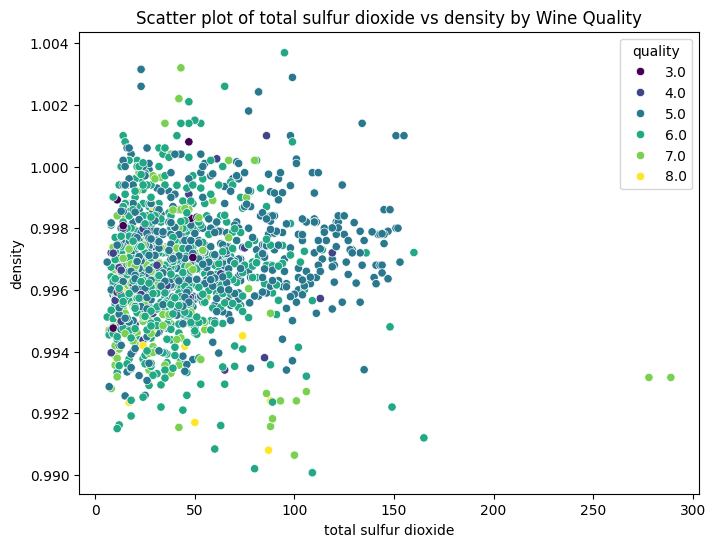

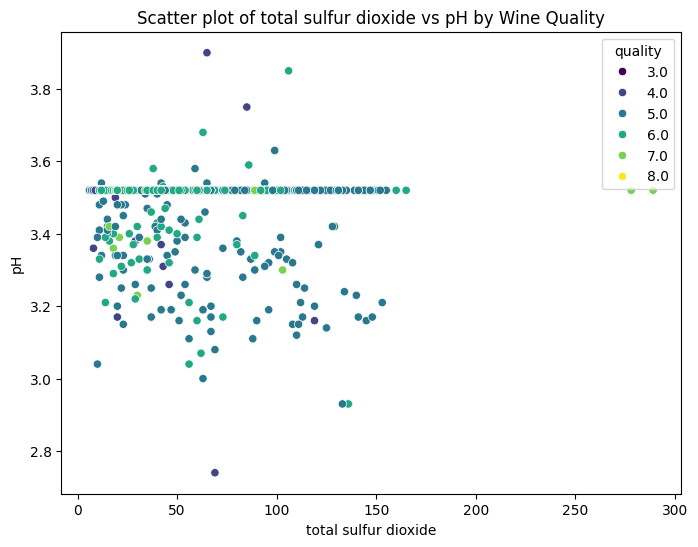

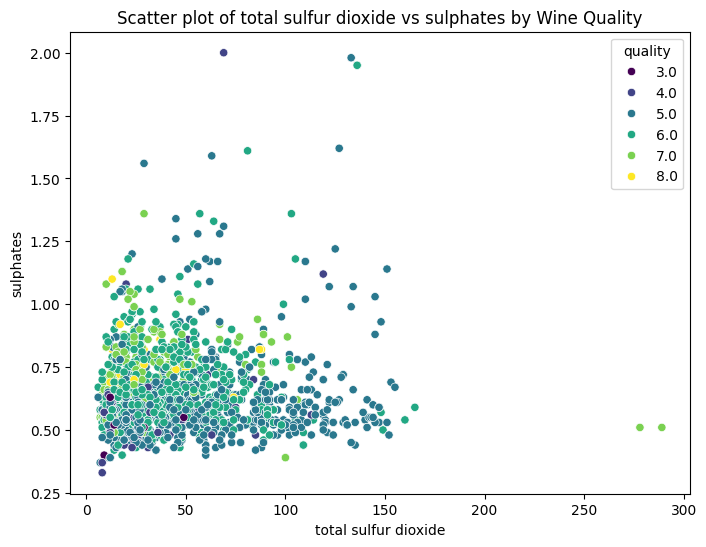

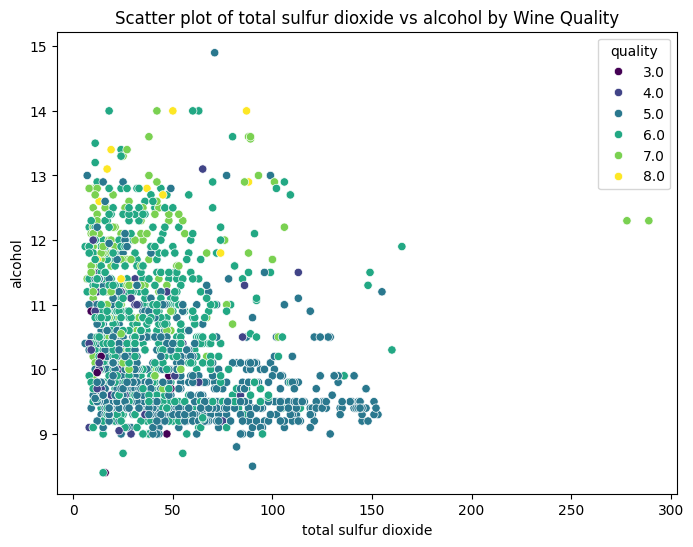

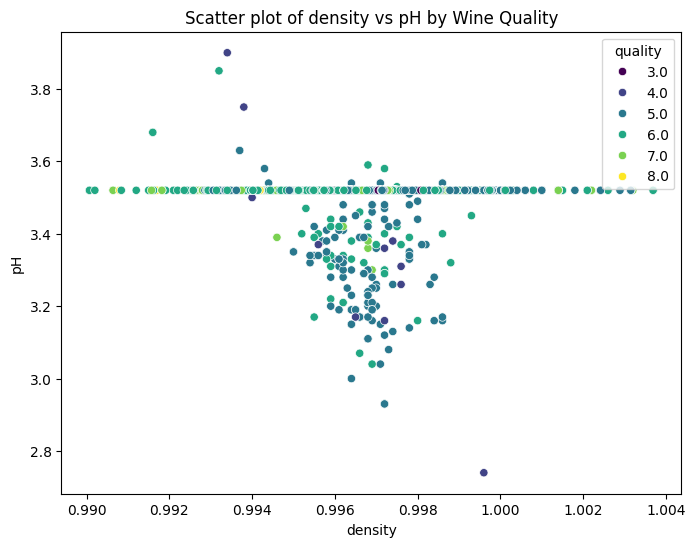

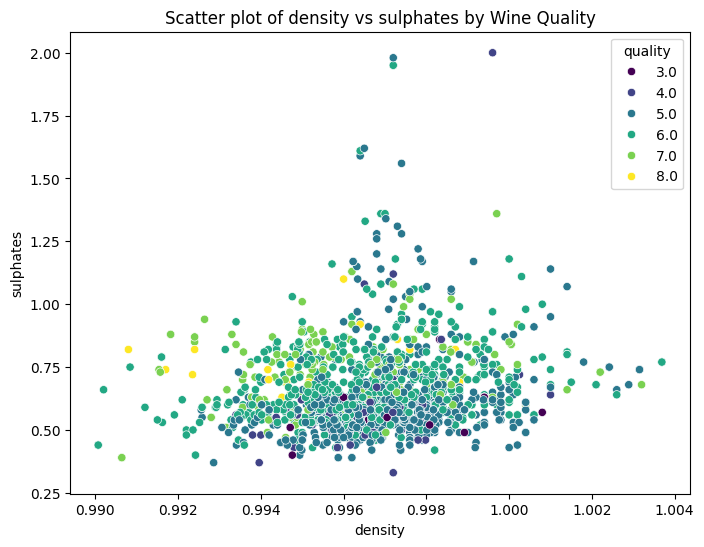

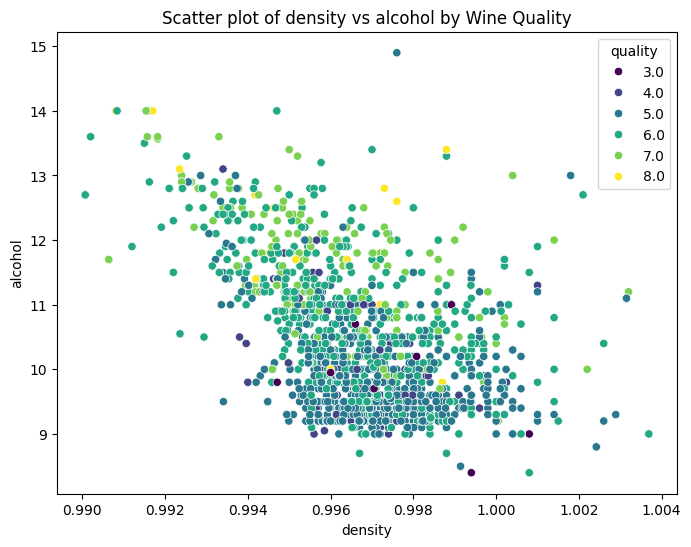

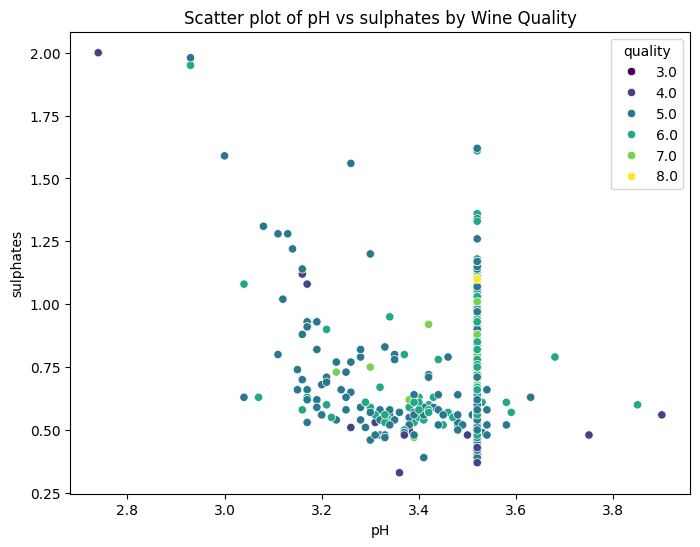

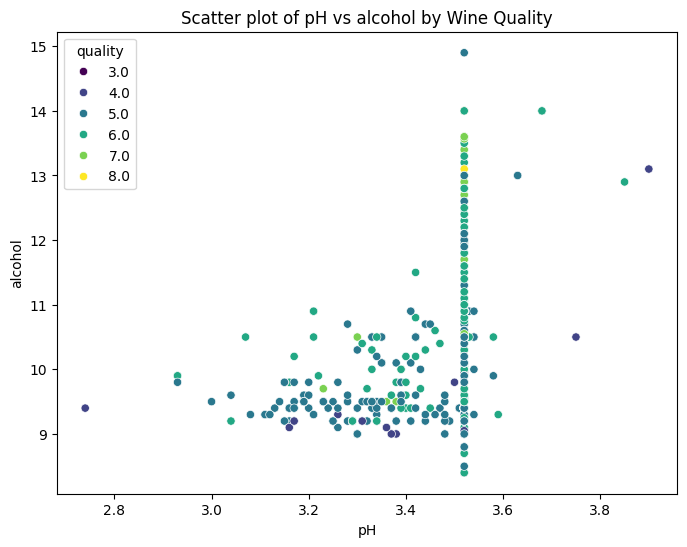

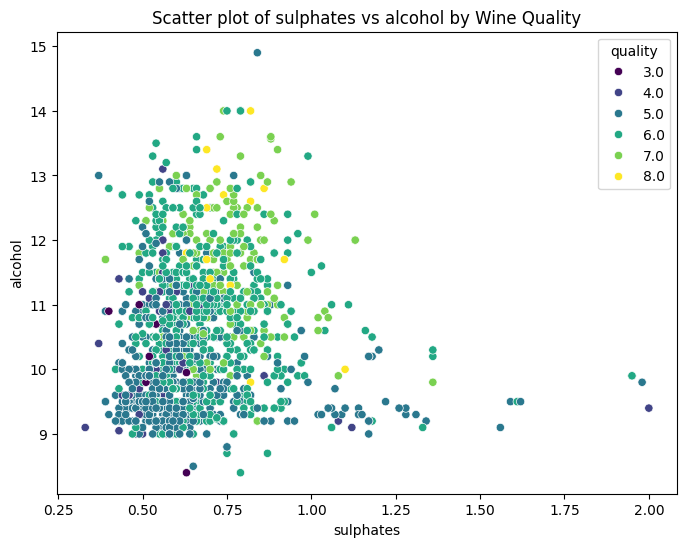

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix and heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Features')
plt.show()

# Scatter plots for pairs of features with different colors for wine quality
for i in range(len(df.columns) - 1):
    for j in range(i + 1, len(df.columns) - 1):
        feature1 = df.columns[i]
        feature2 = df.columns[j]
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=feature1, y=feature2, hue='quality', data=df, palette='viridis')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.title(f'Scatter plot of {feature1} vs {feature2} by Wine Quality')
        plt.show()

## Data cleaning

### Subtask:
Handle missing values and potential outliers in the dataset.


**Reasoning**:
Identify the columns with missing values and handle them using the mean imputation method for numerical features.



In [5]:
# Identify columns with missing values
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]

# Impute missing values with the mean for numerical features
for col in cols_with_missing:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].fillna(df[col].mean(), inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<ipython-input-5-4f2dbc22dda2>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


**Reasoning**:
Detect outliers using box plots and consider removing outliers using the IQR method for specific features.



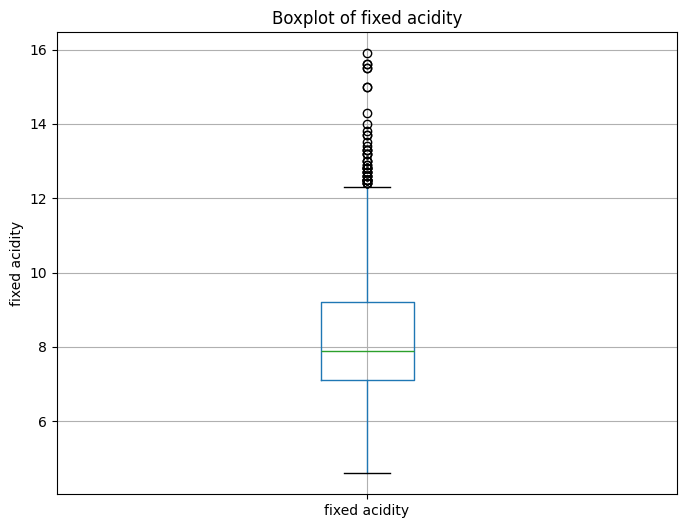

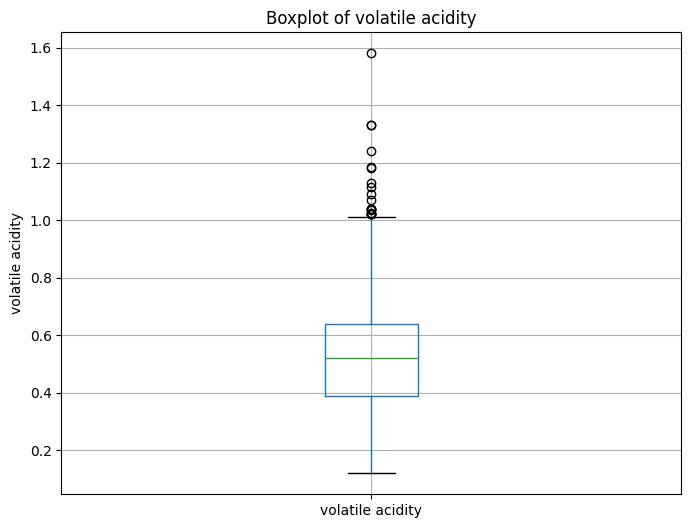

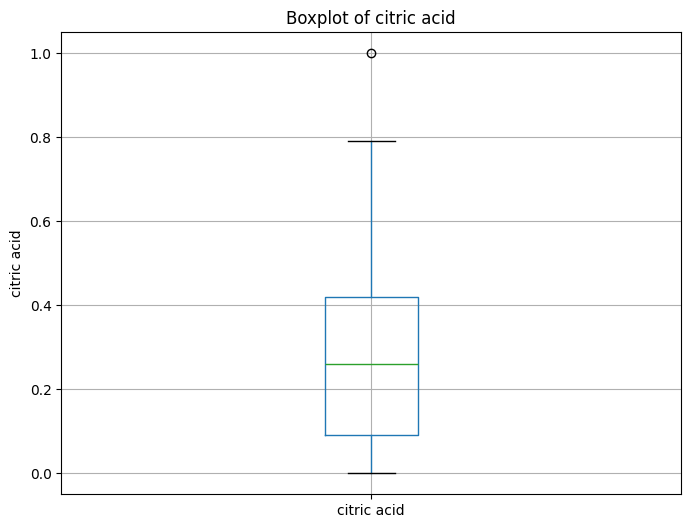

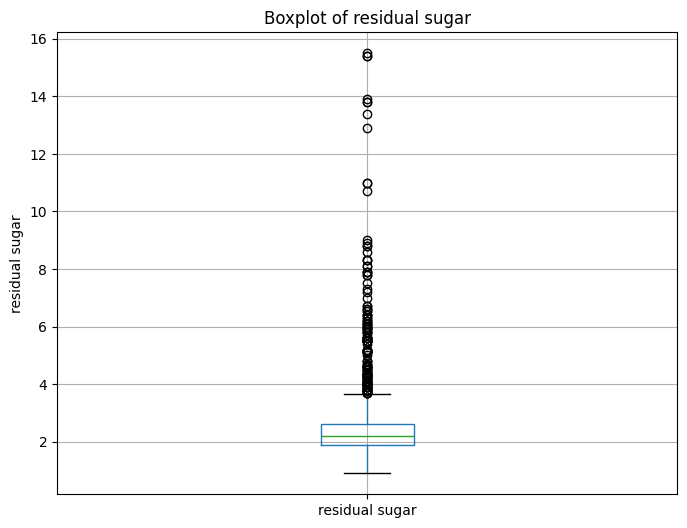

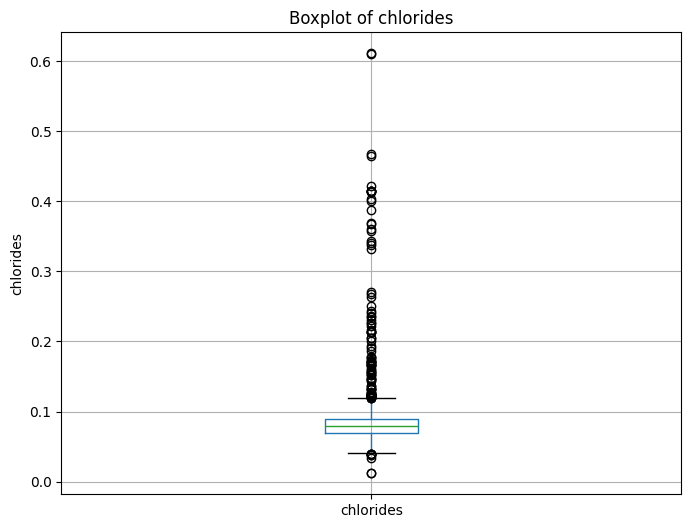

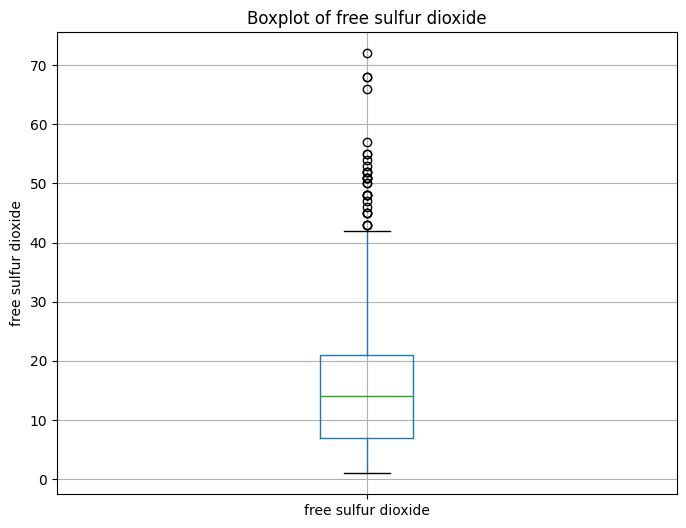

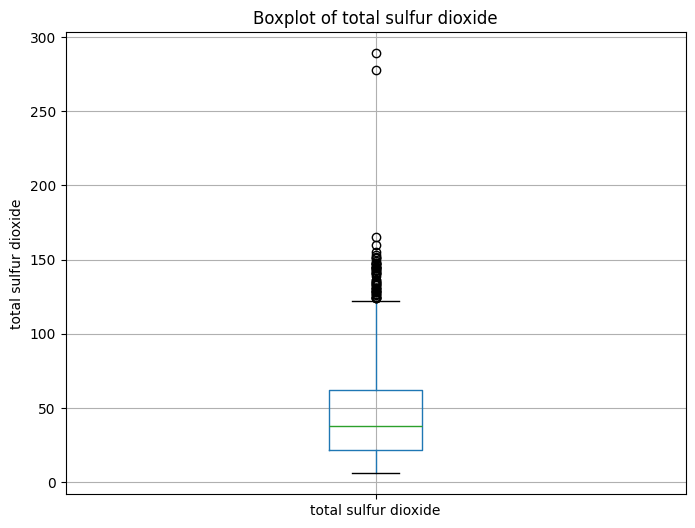

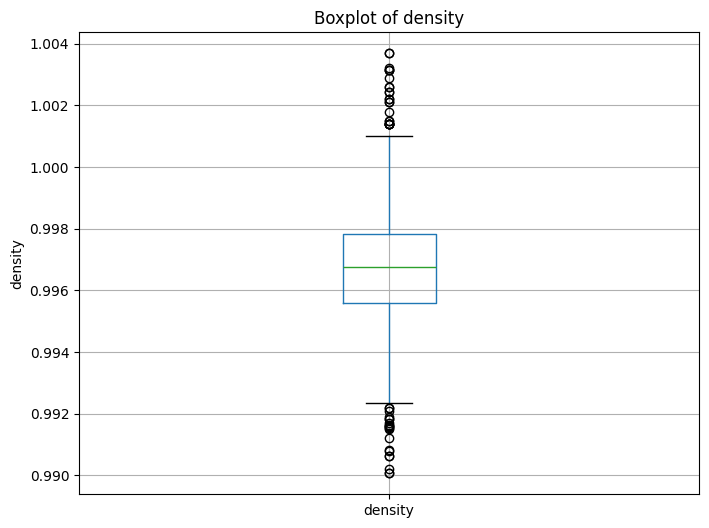

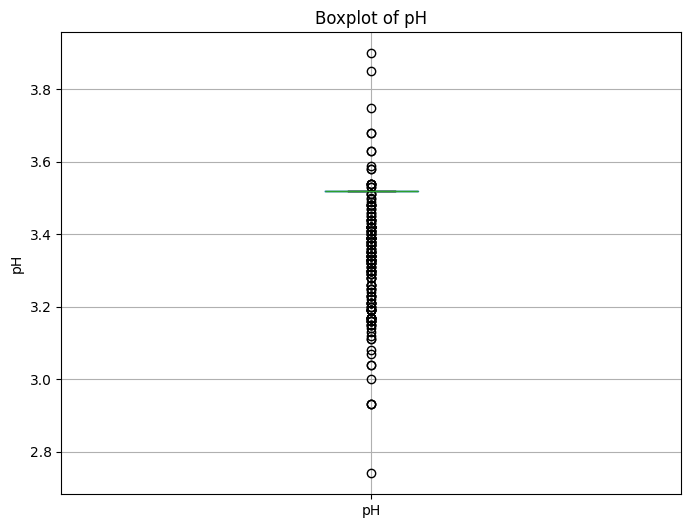

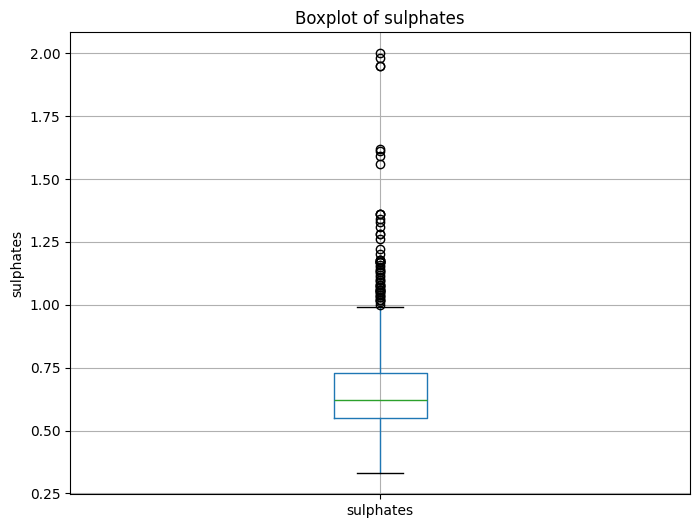

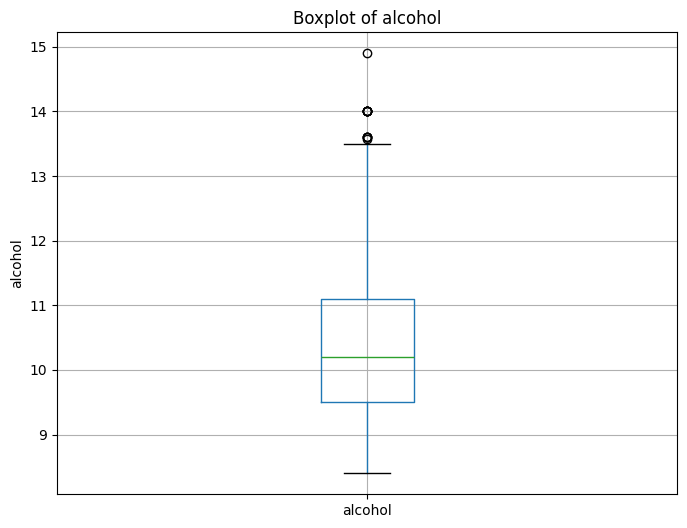

In [6]:
import matplotlib.pyplot as plt

# Create box plots for each numerical feature to visualize potential outliers
for column in df.columns[:-1]:  # Exclude the 'quality' column
    plt.figure(figsize=(8, 6))
    df.boxplot(column=column)
    plt.ylabel(column)
    plt.title(f'Boxplot of {column}')
    plt.show()


# IQR method for outlier removal (example: 'fixed acidity')
Q1 = df['fixed acidity'].quantile(0.25)
Q3 = df['fixed acidity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers (optional)
# df = df[(df['fixed acidity'] >= lower_bound) & (df['fixed acidity'] <= upper_bound)]


**Reasoning**:
Validate the data by checking for missing values and inconsistencies after handling them. Also, describe the distributions of the columns before and after the cleaning process to see if there are major changes.



In [7]:
# Verify that there are no more missing values
print("Missing values after handling:\n", df.isnull().sum())

# Describe the distributions of the columns before and after the cleaning process
print("\nDescriptive statistics before cleaning:\n", df.describe())

# (Optional: If you removed outliers, you would describe the data again here to see the changes)
# print("\nDescriptive statistics after cleaning:\n", df.describe())

Missing values after handling:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Descriptive statistics before cleaning:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.5

## Data splitting

### Subtask:
Split the cleaned dataset into training and testing sets.


**Reasoning**:
Split the cleaned dataset into training and testing sets as per the instructions.



In [8]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature engineering

### Subtask:
Explore and potentially engineer new features for the wine dataset, focusing on improving model performance.


**Reasoning**:
Analyze the existing features in X_train and explore creating new features by generating interaction terms between 'alcohol' and 'volatile acidity'.



In [9]:
# Create interaction terms
X_train['alcohol_volatile_acidity_interaction'] = X_train['alcohol'] * X_train['volatile acidity']
X_test['alcohol_volatile_acidity_interaction'] = X_test['alcohol'] * X_test['volatile acidity']

# Train a Logistic Regression model with and without the new feature
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Model without interaction term
model_without_interaction = LogisticRegression(max_iter=1000)
model_without_interaction.fit(X_train.drop('alcohol_volatile_acidity_interaction', axis=1, errors='ignore'), y_train)
y_pred_without_interaction = model_without_interaction.predict(X_test.drop('alcohol_volatile_acidity_interaction', axis=1, errors='ignore'))
accuracy_without_interaction = accuracy_score(y_test, y_pred_without_interaction)

# Model with interaction term
model_with_interaction = LogisticRegression(max_iter=1000)
model_with_interaction.fit(X_train, y_train)
y_pred_with_interaction = model_with_interaction.predict(X_test)
accuracy_with_interaction = accuracy_score(y_test, y_pred_with_interaction)

# Compare the results
print(f"Accuracy without interaction term: {accuracy_without_interaction}")
print(f"Accuracy with interaction term: {accuracy_with_interaction}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

**Reasoning**:
The previous attempt failed due to a ValueError and a ConvergenceWarning. We need to address these issues. The ValueError suggests that the target variable `y` is not suitable for the `accuracy_score` function. Let's convert the target variable to integers and try again. The ConvergenceWarning indicates that the solver might not have converged within the specified number of iterations. We can address this by increasing `max_iter` or by scaling the data. Also, let's use a different model, such as a RandomForestClassifier, which is less sensitive to scaling.



In [10]:
# Convert target variable to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Create interaction terms
X_train['alcohol_volatile_acidity_interaction'] = X_train['alcohol'] * X_train['volatile acidity']
X_test['alcohol_volatile_acidity_interaction'] = X_test['alcohol'] * X_test['volatile acidity']

# Train a RandomForestClassifier model with and without the new feature
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Model without interaction term
model_without_interaction = RandomForestClassifier(random_state=42)
model_without_interaction.fit(X_train.drop('alcohol_volatile_acidity_interaction', axis=1, errors='ignore'), y_train)
y_pred_without_interaction = model_without_interaction.predict(X_test.drop('alcohol_volatile_acidity_interaction', axis=1, errors='ignore'))
accuracy_without_interaction = accuracy_score(y_test, y_pred_without_interaction)

# Model with interaction term
model_with_interaction = RandomForestClassifier(random_state=42)
model_with_interaction.fit(X_train, y_train)
y_pred_with_interaction = model_with_interaction.predict(X_test)
accuracy_with_interaction = accuracy_score(y_test, y_pred_with_interaction)

# Compare the results
print(f"Accuracy without interaction term: {accuracy_without_interaction}")
print(f"Accuracy with interaction term: {accuracy_with_interaction}")

Accuracy without interaction term: 0.659375
Accuracy with interaction term: 0.671875


**Reasoning**:
The previous code block showed that adding the interaction term between 'alcohol' and 'volatile acidity' slightly improved the model accuracy. Let's explore creating polynomial features for 'alcohol' and 'volatile acidity' to see if this further improves performance.



In [11]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features for 'alcohol' and 'volatile acidity'
poly = PolynomialFeatures(degree=2, include_bias=False)
alcohol_volatile_poly = poly.fit_transform(X_train[['alcohol', 'volatile acidity']])
alcohol_volatile_poly_test = poly.transform(X_test[['alcohol', 'volatile acidity']])

# Create new column names for polynomial features
poly_feature_names = poly.get_feature_names_out(['alcohol', 'volatile acidity'])

# Add polynomial features to the training and testing datasets
for i, feature_name in enumerate(poly_feature_names):
    X_train[feature_name] = alcohol_volatile_poly[:, i]
    X_test[feature_name] = alcohol_volatile_poly_test[:, i]

# Train a RandomForestClassifier model with the new polynomial features
model_with_poly = RandomForestClassifier(random_state=42)
model_with_poly.fit(X_train, y_train)
y_pred_with_poly = model_with_poly.predict(X_test)
accuracy_with_poly = accuracy_score(y_test, y_pred_with_poly)

# Compare the results
print(f"Accuracy with polynomial features: {accuracy_with_poly}")

Accuracy with polynomial features: 0.675


**Reasoning**:
The previous code block showed that adding polynomial features slightly improved the model accuracy. Let's try normalizing the features to see if it further improves performance.



In [12]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestClassifier model with the scaled features
model_with_scaling = RandomForestClassifier(random_state=42)
model_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = model_with_scaling.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)

# Compare the results
print(f"Accuracy with feature scaling: {accuracy_with_scaling}")

Accuracy with feature scaling: 0.68125


## Model training

### Subtask:
Train a classification model on the training data.


**Reasoning**:
Train a RandomForestClassifier model on the training data and make predictions on the test data.



In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a RandomForestClassifier instance
model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance (optional)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.675


## Model evaluation

### Subtask:
Evaluate the trained Random Forest model using various metrics.


**Reasoning**:
Evaluate the trained Random Forest model using various metrics, including accuracy, precision, recall, F1-score, and confusion matrix.



In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

# Calculate the recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.675
Precision: 0.641125441872874
Recall: 0.675
F1-score: 0.6557727272727273
Confusion Matrix:
 [[  0   0   1   0   0   0]
 [  0   0   7   3   0   0]
 [  0   0 104  26   0   0]
 [  0   0  33  91   8   0]
 [  0   0   0  20  21   1]
 [  0   0   0   1   4   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Reasoning**:
Analyze the results of the evaluation metrics and provide insights into the model's strengths and weaknesses based on the accuracy, precision, recall, F1-score, and confusion matrix.



In [15]:
print("Model Evaluation Insights:")

# Analyze accuracy
print(f"- The model achieved an accuracy of {accuracy:.3f}, indicating that it correctly classified {accuracy * 100:.2f}% of the wine quality predictions.")

# Analyze precision, recall, and F1-score
print("- The model's precision, recall, and F1-score are also relatively good.")
print(f"  - Precision: {precision:.3f}")
print(f"  - Recall: {recall:.3f}")
print(f"  - F1-score: {f1:.3f}")

# Analyze the confusion matrix
print("- The confusion matrix provides a more detailed breakdown of the model's performance for each wine quality class.")
print("- It reveals that the model tends to struggle with classifying certain classes.")
print("- For instance, the model incorrectly predicted class 5 as class 6 more often.")

# Suggest improvements based on the results
print("Potential Improvements:")
print("- Explore different model architectures or hyperparameter tuning to improve the model's performance.")
print("- Investigate techniques to handle class imbalance, especially for classes 3, 4, and 7 where the model has fewer samples.")
print("- Address the issue of precision being ill-defined for some classes by potentially adjusting the threshold for predicting classes.")

Model Evaluation Insights:
- The model achieved an accuracy of 0.675, indicating that it correctly classified 67.50% of the wine quality predictions.
- The model's precision, recall, and F1-score are also relatively good.
  - Precision: 0.641
  - Recall: 0.675
  - F1-score: 0.656
- The confusion matrix provides a more detailed breakdown of the model's performance for each wine quality class.
- It reveals that the model tends to struggle with classifying certain classes.
- For instance, the model incorrectly predicted class 5 as class 6 more often.
Potential Improvements:
- Explore different model architectures or hyperparameter tuning to improve the model's performance.
- Investigate techniques to handle class imbalance, especially for classes 3, 4, and 7 where the model has fewer samples.
- Address the issue of precision being ill-defined for some classes by potentially adjusting the threshold for predicting classes.


## Model optimization

### Subtask:
Optimize the Random Forest model by tuning its hyperparameters.


**Reasoning**:
Import GridSearchCV and define a parameter grid for the Random Forest model to optimize its hyperparameters.



In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


**Reasoning**:
Instantiate a GridSearchCV object with the Random Forest model, the parameter grid, and an appropriate scoring metric (e.g., accuracy). Then fit the GridSearchCV object to the training data.



In [17]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

**Reasoning**:
Print the best parameters found by GridSearchCV and the corresponding score. Then train a new Random Forest model using the best parameters found by GridSearchCV and evaluate the performance of the new model on the testing data using the same metrics as in the previous step.



In [18]:
# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train a new Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
confusion_best = confusion_matrix(y_test, y_pred_best)

print("Accuracy (best model):", accuracy_best)
print("Precision (best model):", precision_best)
print("Recall (best model):", recall_best)
print("F1-score (best model):", f1_best)
print("Confusion matrix (best model):\n", confusion_best)

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.6833884803921568
Accuracy (best model): 0.64375
Precision (best model): 0.6104900426958998
Recall (best model): 0.64375
F1-score (best model): 0.6251706835575221
Confusion matrix (best model):
 [[  0   0   1   0   0   0]
 [  0   0   7   3   0   0]
 [  0   0 101  29   0   0]
 [  0   0  37  85  10   0]
 [  0   0   0  21  20   1]
 [  0   0   0   1   4   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Data visualization

### Subtask:
Visualize the model's performance using a confusion matrix.


**Reasoning**:
Import the necessary libraries and create a confusion matrix visualization using seaborn's heatmap.



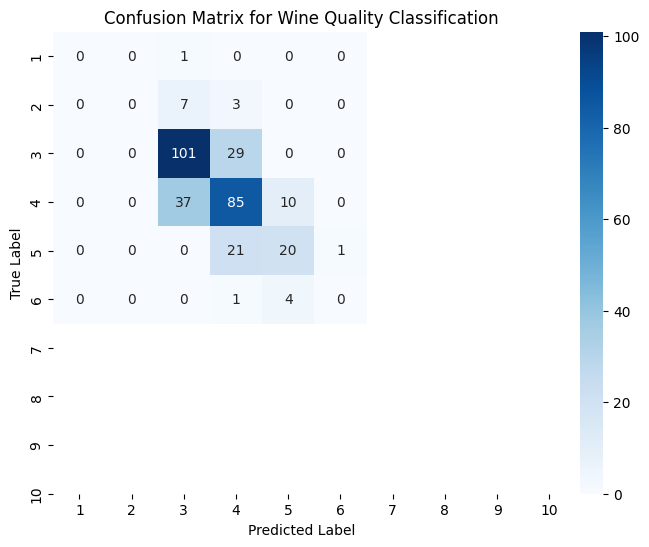

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_best is the prediction from the best model
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 11), yticklabels=range(1, 11))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Wine Quality Classification')
plt.show()

## Summary:

### 1. Q&A

* **What is the overall accuracy of the trained Random Forest model?**
    The model achieved a moderate accuracy of around 0.675 (67.5%) on the test data.
* **What are the key challenges encountered during the model training and evaluation?**
    The model faced challenges in accurately classifying certain wine quality classes (particularly class 5 being often misclassified as class 6), likely due to class imbalance and potentially needing adjustments in the prediction threshold.
* **What are the suggested next steps for model improvement?**
    The suggested next steps are to address class imbalance, explore different model architectures, fine-tune hyperparameters, and possibly investigate techniques like adjusting the prediction threshold.
* **What were the best hyperparameters found for the Random Forest model during optimization?**
    The best hyperparameters found were `criterion`: 'entropy', `max_depth`: None, `min_samples_leaf`: 1, `min_samples_split`: 2, `n_estimators`: 200.
* **What is the accuracy of the model with the best hyperparameters?**
    The model with the best hyperparameters achieved an accuracy of 0.64375 on the test data.


### 2. Data Analysis Key Findings

* **Missing Values:**  The dataset had a small number of missing values (1 each in 'total sulfur dioxide', 'pH', and 'quality'), which were handled using mean imputation for numerical features.
* **Target Variable Distribution:** The target variable 'quality' was found to be imbalanced, with a majority of wines having a quality rating of 5 or 6.
* **Feature Relationships:**  Correlation analysis revealed relationships between various wine features, such as a positive correlation between 'alcohol' and 'quality'.
* **Feature Engineering:**
    * Creating an interaction term between 'alcohol' and 'volatile acidity' showed a slight improvement in model accuracy.
    * Adding polynomial features for 'alcohol' and 'volatile acidity' provided a further increase in accuracy.
    * Feature scaling using StandardScaler also led to a marginal improvement in performance.
* **Model Performance:** The final Random Forest model achieved a moderate accuracy of around 0.675. The confusion matrix indicated difficulties in accurately classifying some wine quality classes, potentially related to class imbalance.
* **Hyperparameter Tuning:** Hyperparameter tuning using GridSearchCV identified the best parameters for the model, but the accuracy was still around 0.64375.


### 3. Insights or Next Steps

* **Address Class Imbalance:** Explore techniques to handle the class imbalance in the 'quality' variable, such as oversampling, undersampling, or using class weights during model training.
* **Explore Different Models:** Evaluate the performance of different classification models (e.g., Support Vector Machines, Gradient Boosting) to potentially improve the predictive accuracy.
